In [1]:
import numpy as np
import pandas as pd
import sklearn as ktl
import pickle
import matplotlib.pylab as plt
import seaborn

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV

import statsmodels.formula.api as smf

# from linearmodels.panel import PanelOLS

from mlxtend.plotting import scatterplotmatrix 

# from stargazer.stargazer import Stargazer
import statistics

In [1]:
import pandas as pd

# Data Manipulation 

### Importing data 

In [2]:
# Sustainable development atlas of Bolivia 

bol = pd.read_csv("../bol_hdi_prediction/data/sdg_atlas_bolivia/GeoDS4Bolivia.csv")
bol = bol.rename(columns={"asdf_id":"id"})

# Remote sensing data 

sat = pd.read_csv("data/satellite/Satelite_data.csv")
#list(sat.columns)

#list(bol.columns)

In [3]:
bol["dep"].value_counts()

dep
La Paz        87
Santa Cruz    56
Cochabamba    47
Potosí        40
Oruro         35
Chuquisaca    29
Beni          19
Pando         15
Tarija        11
Name: count, dtype: int64

### SDG Indexes 

In [4]:
# creating a dataframe with only the composite sdg indexes

sdg_indexes = bol[["id", 'mun_id' , 'index_sdg1','index_sdg2','index_sdg3','index_sdg4','index_sdg5','index_sdg6','index_sdg7', 'index_sdg8','index_sdg9','index_sdg10',
               'index_sdg11','index_sdg13','index_sdg15','index_sdg16','index_sdg17', "imds",]]

#sdg_indexes.isna().sum()

# Export the index variables 
sdg_indexes.to_csv("data/sdg_prediction/sdg_indexes.csv", index=False)

### SDG Indicators 

In [5]:
sdg_indicators = bol[['id','sdg1_4_abs', 'sdg1_1_dtl_abs', 'sdg1_1_pubn_abs', 'sdg1_2_dd_abs', 'sdg1_4_ebs_abs', 'sdg2_2_cm_abs', 'sdg2_2_wow_abs', 'sdg2_4_apu_abs',
                    'sdg2_4_tm_abs', 'sdg3_2_fb_abs', 'sdg3_2_ffb_abs', 'sdg3_3_cd_abs','sdg3_3_pd_abs', 'sdg3_3_mc_abs', 'sdg3_3_tc_abs', 'sdg3_3_vih_abs',
                    'sdg3_7_bpw_abs', 'sdg4_1_mhs_abs', 'sdg4_1_fhs_abs', 'sdg4_4_heu_abs','sdg4_6_pnl_abs', 'sdg4_c_uti_abs', 'sdg4_c_uts_abs', 'sdg6_1_wdc_abs',
                    'sdg6_2_bsc_abs', 'sdg7_1_wec_abs', 'sdg7_1_rec_abs', 'sdg7_1_cec_abs','sdg7_3_tee_abs', 'sdg8_4_rem_abs', 'sdg8_5_ompr_abs',
                    'sdg8_5_ofpr_abs', 'sdg8_6_mlm_abs', 'sdg8_6_wlm_abs','sdg8_10_dbb_abs', 'sdg9_1_rmun_abs', 'sdg9_5_kcd_abs',
                    'sdg9_5_eutf_abs', 'sdg9_c_hf_abs', 'sdg9_c_tr_abs', 'sdg10_2_dss_abs','sdg11_1_ho_abs', 'sdg11_1_wos_abs', 'sdg11_2_mtv_abs',
                    'sdg13_2_tco2_abs', 'sdg13_2_ad_abs', 'sdg15_1_pa_abs','sdg15_5_rl_abs', 'sdg16_1_rh_abs', 'sdg16_6_aob_abs','sdg16_9_ncr_abs', 'sdg17_5_tpi_abs']]

sdg_indicators = sdg_indicators.fillna(0)
#Normalize the y variable 
sdg_indicators_norm = (sdg_indicators-sdg_indicators.mean())/sdg_indicators.std()

sdg_indicators_norm.to_csv("data/sdg_prediction/sdg_indicators_norm.csv", index=False)

### Air Temperature

In [6]:
collab_datasets = []

In [7]:
# Air temperature

air_temp = pd.read_csv("data/satellite/air_temperature UDel.csv")
air_temp = air_temp.drop(columns={"asdf_id",'Level', 'gqid', 'shapeGroup', 'shapeID', 'shapeType', "shapeName"})

#Filter data columns 
air_temp_col = air_temp.loc[:, air_temp.columns.str.contains("20")]

# Changing first part of the name 
for col in air_temp_col:
    new_name = "airTemp" + col.split(".", 1)[1]
    air_temp = air_temp.rename(columns = {col:new_name});

air_temp_2013 = air_temp[["id", 'airTemp2013.max', 'airTemp2013.mean', 'airTemp2013.min']]
air_temp_2012 = air_temp[["id",'airTemp2012.max', 'airTemp2012.mean', 'airTemp2012.min']]    



In [8]:
airTempMean = air_temp.loc[:,air_temp.columns.str.contains("mean|id")]
airTempMean.to_csv("data/satellite/collab_satellite_data/air_tem_mean_2012-17.csv", index=False)
collab_datasets.append("airTempMean")

In [9]:
airTempMax = air_temp.loc[:,air_temp.columns.str.contains("max|id")]
airTempMax.to_csv("data/satellite/collab_satellite_data/air_temp_max_2012-2017.csv", index=False)
collab_datasets.append("airTempMax")

In [10]:
airTempMin = air_temp.loc[:,air_temp.columns.str.contains("min|id")]
airTempMin.to_csv("data/satellite/collab_satellite_data/air_temp_min_2012-2017.csv", index=False)
collab_datasets.append("airTempMin")
airTempMin

,airTemp2012.min,airTemp2013.min,airTemp2014.min,airTemp2015.min,airTemp2016.min,airTemp2017.min,id
0,7.833333,7.408333,7.616667,8.291667,8.516667,8.041667,0
1,8.591667,8.225000,8.375000,8.875000,9.091667,8.416667,1
2,8.591667,8.225000,8.375000,8.875000,9.091667,8.416667,2
3,7.808333,7.833333,8.091667,8.208333,8.825000,8.350000,3
4,7.808333,7.833333,8.091667,8.208333,8.825000,8.350000,4
...,...,...,...,...,...,...,...
334,17.766667,17.375000,17.775000,18.058333,17.733333,17.983333,334
335,9.275000,7.816667,7.366667,9.041667,7.908333,6.541667,335
336,12.516667,11.750000,11.908333,12.600000,11.858333,11.533333,336
337,5.516667,5.233333,5.583333,5.883333,5.800000,5.683333,337


### Distance to coast

In [11]:
distanceCoast = pd.read_csv("data/satellite/Distance to coast.csv")
distanceCoast = distanceCoast.drop(columns = {"asdf_id",'Level', 'gqid', 'shapeGroup', 'shapeID', 'shapeType', "shapeName"})
distanceCoast_col = distanceCoast.loc[:, distanceCoast.columns.str.contains("236")] 

for col in distanceCoast_col: 
    new_name = "distancedistanceCoast2017" + col.split(".",2)[2]
    distanceCoast.rename(columns = {col:new_name}, inplace=True)

distanceCoast.to_csv("data/satellite/collab_satellite_data/coast_distance_2017.csv", index=False)
collab_datasets.append("distanceCoast")
distanceCoast

,distancedistanceCoast2017mean,distancedistanceCoast2017max,distancedistanceCoast2017min,id
0,231558.142943,255432.596116,210006.519535,0
1,354217.744618,385612.430465,333337.012628,1
2,319385.671422,336873.504437,297935.792770,2
3,395058.918868,413065.194725,378907.565657,3
4,394026.100175,413416.434058,374161.065577,4
...,...,...,...,...
334,601521.255953,631690.353370,574997.506773,334
335,452061.884900,496930.636605,402524.438309,335
336,516706.820400,548657.677090,491184.850223,336
337,460235.792153,509097.721043,409157.666871,337


In [12]:
#coastMax = coast.loc[:,coast.columns.str.contains("max|id")]
#coastMax.to_csv("data/satellite/collab_satellite_data/coast_distance_max_2017.csv")
#collab_datasets.append("coastMax")
#coastMax

### Distance to Diamond Deposits

In [13]:
dia = pd.read_csv("data/satellite/Distance to diamond deposits.csv")
dia.drop(columns = {'asdf_id','Level', 'gqid','shapeGroup', 'shapeID','shapeType', 'shapeName'}, inplace=True)
dia_col = dia.loc[:, dia.columns.str.contains("2017")] 

for col in dia_col: 
    new_name = "distanceDia2017" + col.split(".",2)[2]
    dia.rename(columns = {col:new_name}, inplace=True)

#dia.isna().sum()
dia.to_csv("data/satellite/collab_satellite_data/diamond_distance_2017.csv", index=False)
distanceDiamond = dia
collab_datasets.append("distanceDiamond")

In [14]:
#distanceDiaMean = dia.loc[:,dia.columns.str.contains("mean|id")]
#distanceDiaMean.to_csv("data/satellite/collab_satellite_data/diamond_distance_mean_2017.csv")
#collab_datasets.append("distanceDiaMean")
#distanceDiaMean

In [15]:
# distanceDiaMin = dia.loc[:,dia.columns.str.contains("min|id")]
# distanceDiaMin.to_csv("data/satellite/collab_satellite_data/diamond_distance_min_2017.csv")
# collab_datasets.append("distanceDiaMin")
#distanceDiaMin

In [16]:
# distanceDiaMax = dia.loc[:,dia.columns.str.contains("max|id")]
# distanceDiaMax.to_csv("data/satellite/collab_satellite_data/diamond_distance_max_2017.csv")
# collab_datasets.append("distanceDiaMax")
#distanceDiaMax

In [17]:
collab_datasets

['airTempMean', 'airTempMax', 'airTempMin', 'distanceCoast', 'distanceDiamond']

### Distance to drug cultivation 

In [18]:
offset = 10 
dist_drug = pd.read_csv("data/satellite/Distance to drug cultivation.csv")
dist_drug = dist_drug.drop(columns = {'asdf_id','Level', 'gqid','shapeGroup', 'shapeID','shapeType', "shapeName"})
dist_drug_col = dist_drug.loc[:, dist_drug.columns.str.contains("drug")]

for col in dist_drug_col: 
    new_name = "distanceDrug2017" + col.split(".",2)[2]
    dist_drug.rename(columns = {col:new_name}, inplace = True)

#drug_cult.isna().sum()
dist_drug.to_csv("data/satellite/collab_satellite_data/drug_cultivation_distance_2017.csv", index=False)
distanceDrug = dist_drug
collab_datasets.append("distanceDrug")
distanceDrug

,distanceDrug2017mean,distanceDrug2017max,distanceDrug2017min,id
0,254480.409610,268179.305367,238603.239991,0
1,240634.989835,257851.350764,226248.292770,1
2,255861.069636,276752.874362,236397.960037,2
3,142655.243485,160508.011531,122429.392276,3
4,130019.264051,146686.237369,116697.364796,4
...,...,...,...,...
334,69165.652489,99104.269782,36144.101402,334
335,336926.899429,390012.524085,263402.516128,335
336,319999.726060,354352.424424,287315.875372,336
337,470539.013477,492998.289897,441414.291928,337


In [19]:
# distanceDrugMean = dist_drug.loc[:,dist_drug.columns.str.contains("mean|id")]
# distanceDrugMean.to_csv("data/satellite/collab_satellite_data/drug_cultivation_distance_mean_2017.csv")
# collab_datasets.append("distanceDrugMean")
# #distanceDrugMean

In [20]:
# distanceDrugMin = dist_drug.loc[:,dist_drug.columns.str.contains("min|id")]
# distanceDrugMin.to_csv("data/satellite/collab_satellite_data/drug_cultivation_distance_min_2017.csv")
# collab_datasets.append("distanceDrugMin")
# #distanceDrugMin

In [21]:
# distanceDrugMax = dist_drug.loc[:,dist_drug.columns.str.contains("max|id")]
# distanceDrugMax.to_csv("data/satellite/collab_satellite_data/drug_cultivation_distance_max_2017.csv")
# collab_datasets.append("distanceDrugMax")
# #distanceDrugMax

### Distance to road

In [22]:
road = pd.read_csv("data/satellite/Distance to road.csv")
road = road.drop(columns = {'asdf_id', 'Level', 'gqid', 'shapeGroup', 'shapeID', 'shapeType', "shapeName"})
road_col = road.loc[:, road.columns.str.contains("road")]

for col in road_col: 
    new_name = "distanceRoad2017" + col.split(".",2)[2]
    road.rename(columns = {col:new_name}, inplace = True)
road.to_csv("data/satellite/collab_satellite_data/road_distance_2017.csv", index=False)
distanceRoad = road
collab_datasets.append("distanceRoad")
distanceRoad

,distanceRoad2017mean,distanceRoad2017max,distanceRoad2017min,id
0,3718.507826,11304.510596,0.0,0
1,6348.509805,25455.845926,0.0,1
2,5324.288074,16793.769587,0.0,2
3,3264.728111,9142.416469,0.0,3
4,8103.557876,16712.708129,0.0,4
...,...,...,...,...
334,6891.461374,20454.777137,0.0,334
335,6480.294164,22622.989097,0.0,335
336,6274.741604,17483.557303,0.0,336
337,4072.703201,12404.411578,0.0,337


In [23]:
# distanceRoadMean = road.loc[:,road.columns.str.contains("mean|id")]
# distanceRoadMean.to_csv("data/satellite/collab_satellite_data/road_distance_mean_2017.csv")
# collab_datasets.append("distanceRoadMean")
# #distanceRoadMean

In [24]:
# distanceRoadMin = road.loc[:,road.columns.str.contains("min|id")]
# distanceRoadMin.to_csv("data/satellite/collab_satellite_data/road_distance_min_2017.csv")
# collab_datasets.append("distanceRoadMin")
# #distanceRoadMin

In [25]:
# distanceRoadMax = road.loc[:,road.columns.str.contains("max|id")]
# distanceRoadMax.to_csv("data/satellite/collab_satellite_data/road_distance_max_2017.csv")
# collab_datasets.append("distanceRoadMax")
# #distanceRoadMax

### Distance to water

In [26]:
water = pd.read_csv("data/satellite/distance to water.csv")
water = water.drop(columns = {'asdf_id','Level', 'gqid','shapeGroup', 'shapeID', 'shapeType', "shapeName"})
water_col = water.loc[:, water.columns.str.contains("water")]

for col in water_col: 
    new_name = "dist_water2017" + col.split(".",2)[2]
    water.rename(columns = {col:new_name}, inplace = True)

#water.isna().sum()
water.to_csv("data/satellite/collab_satellite_data/water_distance_2017.csv", index=False)
distanceWater = water
collab_datasets.append("distanceWater")
distanceWater

,dist_water2017mean,dist_water2017max,dist_water2017min,id
0,94011.860874,115813.989106,70241.831174,0
1,18145.655416,35374.109099,0.000000,1
2,18152.094263,36134.442210,0.000000,2
3,49006.873772,63582.971423,32613.825454,3
4,45841.910359,62521.085287,27251.667651,4
...,...,...,...,...
334,18707.051147,47610.416512,0.000000,334
335,122548.207708,170448.130327,63458.889138,335
336,65912.259352,95099.237013,31959.254027,336
337,98545.134554,148910.566604,50628.084312,337


In [27]:
# distanceWaterMean = water.loc[:,water.columns.str.contains("mean|id")]
# distanceWaterMean.to_csv("data/satellite/collab_satellite_data/water_distance_mean_2017.csv")
# collab_datasets.append("distanceWaterMean")
# #distanceWaterMean

In [28]:
# distanceWaterMin = water.loc[:,water.columns.str.contains("min|id")] 
# distanceWaterMin.to_csv("data/satellite/collab_satellite_data/water_distance_min_2017.csv")
# collab_datasets.append("distanceWaterMin")
# #distanceWaterMin


In [29]:
# distanceWaterMax = water.loc[:,water.columns.str.contains("max|id")]
# distanceWaterMax.to_csv("data/satellite/collab_satellite_data/water_distance_max_2017.csv")
# collab_datasets.append("distanceWaterMax")
# #distanceWaterMax

### Drug cultivation

In [30]:
offset = 10 
drugCult = pd.read_csv("data/satellite/Drug cultivation site 2017.csv")
drugCult = drugCult.drop(columns = {'asdf_id','Level', 'gqid','shapeGroup', 'shapeID','shapeType', "shapeName"})
drugCult_col = drugCult.loc[:, drugCult.columns.str.contains("categorical")]

for col in drugCult_col: 
    new_name = "drugCult_" + col.split(".categorical_",1)[1] + "2017"
    drugCult.rename(columns = {col:new_name}, inplace = True)

drugCult.to_csv("data/satellite/collab_satellite_data/drug_cultivation_2017.csv", index=False)
collab_datasets.append("drugCult")

In [31]:
collab_datasets

['airTempMean',
 'airTempMax',
 'airTempMin',
 'distanceCoast',
 'distanceDiamond',
 'distanceDrug',
 'distanceRoad',
 'distanceWater',
 'drugCult']

### ESA Landcover

In [32]:
esa_land = pd.read_csv("data/satellite/ESA landcover 2012-2016.csv")

# 2012
esa_land2012 = esa_land.loc[:, esa_land.columns.str.contains("2012|id|name")]
esa_land2012 = esa_land2012.drop(columns = {'gqid', "asdf_id"})
esa_land2012_col = esa_land2012.loc[:, esa_land2012.columns.str.contains("categorical")]

for col in esa_land2012_col:
    new_name = "esa_land2012" + col.split("categorical",1)[1]
    esa_land2012.rename(columns = {col:new_name}, inplace=True)

# 2013
esa_land2013 = esa_land.loc[:, esa_land.columns.str.contains("2013|id|name")]
esa_land2013 = esa_land2013.drop(columns = {'gqid', "asdf_id"})
esa_land2013_col = esa_land2013.loc[:, esa_land2013.columns.str.contains("categorical")]

for col in esa_land2013_col:
    new_name = "esa_land2013" + col.split("categorical",1)[1]
    esa_land2013.rename(columns = {col:new_name}, inplace=True)
    
esaLand = esa_land.loc[:,esa_land.columns.str.contains("categorical|id|name")]

esaLand_col = esaLand.loc[:,esaLand.columns.str.contains("categorical")]
for col in esaLand_col:
    new_name = "esaLandCover" + col.split(".")[1] + col.split("categorical",1)[1]
    esaLand.rename(columns={col:new_name}, inplace=True)
    
esaLand = esaLand.drop(columns={"gqid", "asdf_id"})
esaLand.to_csv("data/satellite/collab_satellite_data/esa_landcover_2012-2016.csv", index=False)
collab_datasets.append("esa_land")
    

/tmp/ipykernel_32230/3480397755.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esaLand.rename(columns={col:new_name}, inplace=True)


In [33]:
esa_land2013

,esa_land2013_grassland,esa_land2013_count,esa_land2013_sparse_vegetation,esa_land2013_bare_areas,esa_land2013_shrubland,esa_land2013_no_data,esa_land2013_rainfed_cropland,esa_land2013_water_bodies,esa_land2013_forest,esa_land2013_wetland,esa_land2013_mosaic_cropland,esa_land2013_irrigated_cropland,esa_land2013_snow_ice,esa_land2013_urban,esa_landcover.2013.count,id
0,76,6514,541,5688,209,0,0,0,0,0,0,0,0,0,6548.370117,0
1,598,10386,3248,6127,116,0,203,92,0,0,2,0,0,0,10423.300781,1
2,456,11324,811,9518,108,0,219,202,4,0,6,0,0,0,11360.469727,2
3,2693,5847,1683,685,536,0,0,0,0,0,212,0,0,38,5871.060059,3
4,1667,5775,2568,784,696,0,12,0,26,0,22,0,0,0,5799.520020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,6107,26381,149,70,7160,0,804,3,11503,0,585,0,0,0,26432.339844,334
335,3075,72764,38925,230,30528,0,0,0,2,0,2,0,0,2,72869.789551,335
336,2228,23413,13353,643,7068,0,10,0,101,0,0,0,0,10,23461.900391,336
337,471,28294,14616,11533,1580,0,22,0,2,0,30,0,0,40,28347.799316,337


### GEE modis 

In [34]:
gee_modis = pd.read_csv("data/satellite/GEE modis 2012-2017.csv")

# 2012
gee_modis2012 = gee_modis[gee_modis["year"] == 2012]
gee_modis2012 = gee_modis2012.reset_index(drop=True)
gee_modis2012 = gee_modis2012.drop(columns = {'system:index','country','level','system:time_start','.geo',"year","name"})
gee_modis2012 = gee_modis2012.add_prefix("gee_")
gee_modis2012 = gee_modis2012.rename(columns = {"gee_id":"id"})


# 2013
gee_modis2013 = gee_modis[gee_modis["year"] == 2013]
gee_modis2013 = gee_modis2013.reset_index(drop=True)
gee_modis2013 = gee_modis2013.drop(columns = {'system:index','country','level','system:time_start','.geo',"year","name"})
gee_modis2013 = gee_modis2013.add_prefix("gee_")
gee_modis2013 = gee_modis2013.rename(columns = {"gee_id":"id"})

data = {"id":range(0,339,1)}
geeModis = pd.DataFrame(data)

years = range(2012,2017)
for year in years:
    geeTemp = gee_modis[gee_modis["year"] == year] 
    geeTemp = geeTemp.reset_index(drop=True)
    geeTemp = geeTemp.drop(columns={'system:index','country','level','system:time_start','.geo',"year","name"}) 
    geeTemp = geeTemp.add_prefix("gee_").add_suffix(str(year))
    geeTemp = geeTemp.rename(columns={f"gee_id{year}":"id"}) 
    
    geeModis = geeModis.merge(geeTemp, how="outer", on="id")

geeModis.to_csv("data/satellite/collab_satellite_data/gee_modis_landcover_2012-2016.csv", index=False)
collab_datasets.append("geeModis")



In [35]:
geeModis

,id,gee_agriculture2012,gee_total_area2012,gee_urban2012,gee_agriculture2013,gee_total_area2013,gee_urban2013,gee_agriculture2014,gee_total_area2014,gee_urban2014,gee_agriculture2015,gee_total_area2015,gee_urban2015,gee_agriculture2016,gee_total_area2016,gee_urban2016
0,0,43.404496,581.735042,0.000000,42.231226,581.735042,0.000000,39.941830,581.735042,0.000000,45.464746,581.735042,0.000000,44.704407,581.735042,0.000000
1,1,67.986146,945.929769,0.000000,84.500515,945.929769,0.000000,96.081711,945.929769,0.000000,102.876454,945.929769,0.000000,84.713804,945.929769,0.000000
2,2,73.398331,1030.905800,0.000000,59.249582,1030.905800,0.000000,51.050979,1030.905800,0.000000,48.758915,1030.905800,0.000000,46.409809,1030.905800,0.000000
3,3,349.780757,527.435848,3.851735,381.968875,527.435848,3.851735,392.927305,527.435848,3.851735,392.443974,527.435848,3.851735,374.132910,527.435848,3.851735
4,4,335.997213,526.410448,0.000000,371.039222,526.410448,0.000000,385.467148,526.410448,0.000000,388.404058,526.410448,0.000000,366.838441,526.410448,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,1769.589382,2396.771967,0.855929,1748.340851,2396.771967,0.855929,1792.125731,2396.771967,0.855929,1822.187674,2396.771967,0.855929,1873.581634,2396.771967,0.855929
335,335,1629.285641,6495.908803,75.114834,1706.801805,6495.908803,75.114834,1786.273653,6495.908803,75.114834,1788.708123,6495.908803,75.114834,1722.510767,6495.908803,75.114834
336,336,598.685668,2088.460239,29.128207,641.447599,2088.460239,29.128207,664.547762,2088.460239,29.128207,682.584550,2088.460239,29.128207,665.515275,2088.460239,29.128207
337,337,442.599546,2497.413523,15.898891,533.260680,2497.413523,15.898891,601.793312,2497.413523,15.898891,619.745985,2497.413523,15.898891,591.620182,2497.413523,15.898891


### GISA 

In [36]:
gisa = pd.read_csv("data/satellite/GISA 2012-2019.csv")
gisa = gisa.drop(columns = {'system:index','country','level','system:time_start','.geo',"name"})

# 2012
gisa2012 = gisa[gisa["year"]==2012]
gisa2012 = gisa2012.rename(columns = {"total_area":"gisa2012"})

# 2013
gisa2013 = gisa[gisa["year"]==2013]
gisa2013 = gisa2013.rename(columns = {"total_area":"gisa2013"})

startDataId = {"id": range(0,339)}
gisaCollab = pd.DataFrame(startDataId)

years = range(2012,2020)
for year in years: 
    gisaTemp = gisa[gisa["year"]==year]
    gisaTemp = gisaTemp.rename(columns={"total_area":f"gisa{year}"})
    gisaTemp = gisaTemp.drop(columns={"year"})
    
    gisaCollab = gisaCollab.merge(gisaTemp, how="outer", on="id")

gisaCollab.to_csv("data/satellite/collab_satellite_data/gisa_2012-2019.csv", index=False)
collab_datasets.append("gisaCollab")

In [37]:
collab_datasets

['airTempMean',
 'airTempMax',
 'airTempMin',
 'distanceCoast',
 'distanceDiamond',
 'distanceDrug',
 'distanceRoad',
 'distanceWater',
 'drugCult',
 'esa_land',
 'geeModis',
 'gisaCollab']

### GHSL

In [ ]:
ghsl = pd.read_csv("data/satellite/global_human_settlement_layer.csv")
ghsl = ghsl.drop(columns=['system:index', 'country', 'level', 'system:time_start', '.geo', "year", "name"])
ghsl = ghsl.rename(columns = {"total_volume": "ghsl2015"})
#ghsl["ln_ghsl2015"] = np.log(ghsl["ghsl2015"])

ghsl.to_csv("data/satellite/collab_satellite_data/ghsl_2015.csv", index=False)
collab_datasets.append("ghsl")

In [90]:
ghsl

,id,ghsl2015,ln_ghsl2015
0,45,9.235616e+05,13.735993
1,56,4.654564e+06,15.353359
2,57,1.741870e+06,14.370470
3,70,1.438793e+06,14.179315
4,73,1.846201e+06,14.428641
...,...,...,...
334,97,8.858590e+06,15.996898
335,98,2.717591e+06,14.815256
336,101,1.025592e+08,18.445951
337,321,1.594804e+07,16.584847


### Gold deposits

In [300]:
#gold =  pd.read_csv("data/satellite/Gold deposits.csv")

### Physical elevation 

In [301]:
elev = pd.read_csv("data/satellite/Physical Elevation.csv")
elev = elev.drop(columns = {'asdf_id','Level','gqid','shapeGroup', 'shapeID','shapeType', "shapeName"})
elev_col = elev.loc[:, elev.columns.str.contains("elevation")]

for col in elev_col:
    new_name = "elev2017" + col.split(".",2)[2]
    elev = elev.rename(columns = {col:new_name})

### Malaria atlas 

In [95]:
offset = 1000 

mala = pd.read_csv("data/satellite/Malaria Atlas.csv")
mala = mala.drop(columns = {'asdf_id','Level', 'gqid','shapeGroup','shapeID','shapeType',"shapeName"})

# 2012
mala2012 = mala.loc[:, mala.columns.str.contains("2012", regex=True)]
mala2012.reset_index(names="id", inplace=True)
mala2012_col = mala2012.loc[:, mala2012.columns.str.contains("rate")]

for col in mala2012_col:
    new_name = "mal_rt_2012" + col.split(".",2)[2]
    mala2012 = mala2012.rename(columns = {col:new_name})

# 2013
mala2013 = mala.loc[:, mala.columns.str.contains("2013", regex=True)]
mala2013.reset_index(names="id", inplace=True)
mala2013_col = mala2013.loc[:, mala2013.columns.str.contains("rate")]

for col in mala2013_col:
    new_name = "mal_rt_2013" + col.split(".",2)[2]
    mala2013 = mala2013.rename(columns = {col:new_name})

mala

,map_pf_incidence_rate.2012.mean,map_pf_incidence_rate.2012.min,map_pf_incidence_rate.2012.max,map_pf_incidence_rate.2012.count,map_pf_incidence_rate.2013.mean,map_pf_incidence_rate.2013.min,map_pf_incidence_rate.2013.max,map_pf_incidence_rate.2013.count,map_pf_incidence_rate.2014.mean,map_pf_incidence_rate.2014.min,...,map_pf_incidence_rate.2017.count,map_pf_incidence_rate.2018.mean,map_pf_incidence_rate.2018.min,map_pf_incidence_rate.2018.max,map_pf_incidence_rate.2018.count,map_pf_incidence_rate.2019.mean,map_pf_incidence_rate.2019.min,map_pf_incidence_rate.2019.max,map_pf_incidence_rate.2019.count,id
0,0.000000e+00,0.0,0.000000,31.170000,0.000000,0.0,0.000000,31.170000,0.000000e+00,0.0,...,31.170000,0.0,0,0.0,31.170000,0.000000e+00,0.0,0.000000e+00,31.170000,0
1,0.000000e+00,0.0,0.000000,48.570000,0.000000,0.0,0.000000,48.570000,0.000000e+00,0.0,...,48.570000,0.0,0,0.0,48.570000,0.000000e+00,0.0,0.000000e+00,48.570000,1
2,0.000000e+00,0.0,0.000000,52.689999,0.000000,0.0,0.000000,52.689999,0.000000e+00,0.0,...,52.689999,0.0,0,0.0,52.689999,0.000000e+00,0.0,0.000000e+00,52.689999,2
3,0.000000e+00,0.0,0.000000,27.550001,0.000000,0.0,0.000000,27.550001,0.000000e+00,0.0,...,27.550001,0.0,0,0.0,27.550001,0.000000e+00,0.0,0.000000e+00,27.550001,3
4,0.000000e+00,0.0,0.000000,27.420002,0.000000,0.0,0.000000,27.420002,0.000000e+00,0.0,...,27.420002,0.0,0,0.0,27.420002,0.000000e+00,0.0,0.000000e+00,27.420002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,5.190000e-06,0.0,0.000089,120.930000,0.000048,0.0,0.000509,120.930000,2.340000e-06,0.0,...,120.930000,0.0,0,0.0,120.930000,1.690000e-08,0.0,7.680000e-07,120.930000,334
335,0.000000e+00,0.0,0.000000,330.320007,0.000000,0.0,0.000000,330.320007,0.000000e+00,0.0,...,330.320007,0.0,0,0.0,330.320007,0.000000e+00,0.0,0.000000e+00,330.320007,335
336,0.000000e+00,0.0,0.000000,107.290001,0.000000,0.0,0.000000,107.290001,0.000000e+00,0.0,...,107.290001,0.0,0,0.0,107.290001,0.000000e+00,0.0,0.000000e+00,107.290001,336
337,6.930000e-09,0.0,0.000004,129.850006,0.000000,0.0,0.000000,129.850006,4.190000e-09,0.0,...,129.850006,0.0,0,0.0,129.850006,8.810000e-12,0.0,5.200000e-09,129.850006,337


In [93]:
mala

,map_pf_incidence_rate.2012.mean,map_pf_incidence_rate.2012.min,map_pf_incidence_rate.2012.max,map_pf_incidence_rate.2012.count,map_pf_incidence_rate.2013.mean,map_pf_incidence_rate.2013.min,map_pf_incidence_rate.2013.max,map_pf_incidence_rate.2013.count,map_pf_incidence_rate.2014.mean,map_pf_incidence_rate.2014.min,...,map_pf_incidence_rate.2017.count,map_pf_incidence_rate.2018.mean,map_pf_incidence_rate.2018.min,map_pf_incidence_rate.2018.max,map_pf_incidence_rate.2018.count,map_pf_incidence_rate.2019.mean,map_pf_incidence_rate.2019.min,map_pf_incidence_rate.2019.max,map_pf_incidence_rate.2019.count,id
0,0.000000e+00,0.0,0.000000,31.170000,0.000000,0.0,0.000000,31.170000,0.000000e+00,0.0,...,31.170000,0.0,0,0.0,31.170000,0.000000e+00,0.0,0.000000e+00,31.170000,0
1,0.000000e+00,0.0,0.000000,48.570000,0.000000,0.0,0.000000,48.570000,0.000000e+00,0.0,...,48.570000,0.0,0,0.0,48.570000,0.000000e+00,0.0,0.000000e+00,48.570000,1
2,0.000000e+00,0.0,0.000000,52.689999,0.000000,0.0,0.000000,52.689999,0.000000e+00,0.0,...,52.689999,0.0,0,0.0,52.689999,0.000000e+00,0.0,0.000000e+00,52.689999,2
3,0.000000e+00,0.0,0.000000,27.550001,0.000000,0.0,0.000000,27.550001,0.000000e+00,0.0,...,27.550001,0.0,0,0.0,27.550001,0.000000e+00,0.0,0.000000e+00,27.550001,3
4,0.000000e+00,0.0,0.000000,27.420002,0.000000,0.0,0.000000,27.420002,0.000000e+00,0.0,...,27.420002,0.0,0,0.0,27.420002,0.000000e+00,0.0,0.000000e+00,27.420002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,5.190000e-06,0.0,0.000089,120.930000,0.000048,0.0,0.000509,120.930000,2.340000e-06,0.0,...,120.930000,0.0,0,0.0,120.930000,1.690000e-08,0.0,7.680000e-07,120.930000,334
335,0.000000e+00,0.0,0.000000,330.320007,0.000000,0.0,0.000000,330.320007,0.000000e+00,0.0,...,330.320007,0.0,0,0.0,330.320007,0.000000e+00,0.0,0.000000e+00,330.320007,335
336,0.000000e+00,0.0,0.000000,107.290001,0.000000,0.0,0.000000,107.290001,0.000000e+00,0.0,...,107.290001,0.0,0,0.0,107.290001,0.000000e+00,0.0,0.000000e+00,107.290001,336
337,6.930000e-09,0.0,0.000004,129.850006,0.000000,0.0,0.000000,129.850006,4.190000e-09,0.0,...,129.850006,0.0,0,0.0,129.850006,8.810000e-12,0.0,5.200000e-09,129.850006,337


### Photovoltaic potential 

In [97]:
photo = pd.read_csv("data/satellite/Photovoltaic power potential.csv")
photo = photo.drop(columns = {'asdf_id','Level','gqid','shapeGroup', 'shapeID','shapeType', "shapeName"})
photo_col = photo.loc[:,photo.columns.str.contains("global")]

for col in photo_col:
    new_name = "photov2019" + col.split(".",2)[2]
    photo = photo.rename(columns = {col:new_name})
    
photo.to_csv("data/satellite/collab_satellite_data/photovoltaic_potential.csv")
collab_datasets.append("photo")

### Time to major city 

In [304]:
time_to_city = pd.read_csv("data/satellite/time to major city.csv")
time_to_city = time_to_city.drop(columns = {'asdf_id','Level','gqid','shapeGroup', 'shapeID','shapeType', "shapeName"})
time_to_city_col = time_to_city.loc[:, time_to_city.columns.str.contains("access")]

for col in time_to_city_col:
    new_name = "access2016" + col.split(".",2)[2]
    time_to_city = time_to_city.rename(columns = {col:new_name})

#time_to_city

### Precipitation CRU

In [305]:
prec = pd.read_csv("./data/satellite/Yearly precipitaiton CRU.csv")
prec = prec.drop(columns= {"gqid","asdf_id"})

# 2012
prec2012 = prec.loc[:,prec.columns.str.contains("2012|id")]
prec_2012col = prec.loc[:,prec.columns.str.contains("2012")]

for col in prec_2012col:
    new_name = "precCRU2012" + col.split(".", 2)[2]
    prec2012 = prec2012.rename(columns= {col:new_name})

# 2013
prec2013 = prec.loc[:,prec.columns.str.contains("2013|id")]
prec_2013col = prec.loc[:,prec.columns.str.contains("2013")]

for col in prec_2013col:
    new_name = "precCRU2013" + col.split(".", 2)[2]
    prec2013 = prec2013.rename(columns= {col:new_name})


### Ground Slope 

In [306]:
slope = pd.read_csv("./data/satellite/Ground Slope.csv")
slope = slope.drop(columns = {'asdf_id','Level','gqid','shapeGroup', 'shapeID','shapeType', "shapeName"})
slope_col = slope.loc[:, slope.columns.str.contains("slope")]

for col in slope_col:
    new_name = "slope500m2017" + col.split(".",2)[2]
    slope = slope.rename(columns= {col:new_name})

#slope

### Modis Landcover

In [307]:
# TODO: Create a df with the values for 2013

In [308]:
mod_landcover = pd.read_csv("./data/satellite/modis landcover.csv")
mod_landcover = mod_landcover.drop(columns = {'asdf_id','Level','gqid','shapeGroup', 'shapeID','shapeType', 
                                              "shapeName", 'modis_landcover_51.2012.categorical_unclassified',
                                              'modis_landcover_51.2012.categorical_fill_value', "id"})
mod_landcover_col = mod_landcover.loc[:, mod_landcover.columns.str.contains("modis")]

for col in mod_landcover_col: 
    new_name = "land_per_area_2012_" + col.split("_",3)[3]
    mod_landcover = mod_landcover.rename(columns={col:new_name})

# Creating Aggregated variables 
mod_landcover_percent = mod_landcover.div(mod_landcover['land_per_area_2012_count'], axis=0)*100
mod_landcover_percent.reset_index(names="id", inplace=True)

forest_col = mod_landcover.columns[mod_landcover.columns.str.contains("forest")]
mod_landcover_percent["land_per_area_2012_full_forest"] = (mod_landcover_percent.loc[:,forest_col]).sum(axis=1)

savannas_col = mod_landcover.columns[mod_landcover.columns.str.contains("savannas|Grasslands")]
mod_landcover_percent["land_per_area_2012_full_savannas_grasslands"] = (mod_landcover_percent.loc[:,savannas_col]).sum(axis=1)

shrublands_col = mod_landcover.columns[mod_landcover.columns.str.contains("shrublands")]
mod_landcover_percent["land_per_area_2012_full_shrublands"] = (mod_landcover_percent.loc[:,shrublands_col]).sum(axis=1)

mod_landcover_percent_clean = mod_landcover_percent[["id",
                                                    "land_per_area_2012_croplands",
                                                    "land_per_area_2012_full_forest",
                                                    'land_per_area_2012_urban_and_builtup',
                                                    "land_per_area_2012_full_savannas_grasslands",
                                                    "land_per_area_2012_full_shrublands",
                                                    'land_per_area_2012_cropland_natural_vegetation_mosaic']]
#mod_landcover_percent_clean

### Population density

In [309]:
density_pop = pd.read_csv("./data/satellite/Population density 2015.csv")
density_pop = density_pop.drop(columns = {'asdf_id','Level','gqid','shapeGroup', 'shapeID','shapeType', "shapeName"})
density_pop_col = density_pop.loc[:,density_pop.columns.str.contains("density")]

for col in density_pop_col: 
    new_name = "density_pop2015" + col.split(".",2)[2]
    density_pop = density_pop.rename(columns = {col:new_name})
#density_pop

## Create a dataframe with all satellite data


### Unify bol and sat data

### 2012 data 

In [310]:
# Satellite dataframes with the same construction 
dataframes = [coast,dia,dist_drug,road,water,drug_cult,esa_land2012, gee_modis2012, ghsl, elev, mala2012, gisa2012]

# Satellite data from the Bolivia dataset 

satellite_full = bol[["id", 'mun_id' , 'tr400_pop2012', "ln_t400NTLpc2012",'ln_t400NTLpc2020',]]

# Other satellite data
sat_filtered = sat[["id", 'egdp2012','agr_land2012','urb_land2012','pm25_2012','land_temp2012',]]

# Merging the satellite dataframes 
satellite_full = satellite_full.merge(sat_filtered, on="id", how="outer")
satellite_full = satellite_full.merge(air_temp_2012, on="id", how="outer")

for df in dataframes: 
    satellite_full = satellite_full.merge(df, on="id", how="outer")

# Export satellite data
#satellite_full.to_csv("data/sdg_prediction/satellite_full.csv")

#list(satellite_full.columns)

#satellite_full

### 2013 data

In [311]:
# Satellite dataframes with the same construction 
dataframes = [coast,dia,dist_drug,road,water,drug_cult,esa_land2013, gee_modis2013, ghsl, elev, mala2013, gisa2013]

# Satellite data from the Bolivia dataset 

satellite_full_2013 = bol[["id", 'mun_id' , 'tr400_pop2013', "ln_t400NTLpc2013",]]

# Other satellite data
sat_filtered2013 = sat[["id", 'egdp2013','agr_land2013','urb_land2013']]

# Merging the satellite dataframes 
satellite_full_2013 = satellite_full_2013.merge(sat_filtered2013, on="id", how="outer")
satellite_full_2013 = satellite_full_2013.merge(air_temp_2013, on="id", how="outer")

for df in dataframes: 
    satellite_full_2013 = satellite_full_2013.merge(df, on="id", how="outer")

# Export satellite data
#satellite_full.to_csv("data/sdg_prediction/satellite_full.csv")

#list(satellite_full.columns)

satellite_full

,id,mun_id,tr400_pop2012,ln_t400NTLpc2012,ln_t400NTLpc2020,egdp2012,agr_land2012,urb_land2012,pm25_2012,land_temp2012,...,elev2017mean,elev2017max,elev2017min,mal_rt_2012mean,mal_rt_2012min,mal_rt_2012max,mal_rt_2012count,name,gisa2012,year
0,0,40505,2552.5913,11.414175,13.921671,16.568308,0.000000,0.000000,13.985901,301.305780,...,3720.158739,4624,3662,0.000000e+00,0.0,0.000000,31.170000,Esmeralda,0.046584,2012
1,1,40202,4096.1797,12.862933,13.975857,26.782388,0.000000,0.000000,17.503322,298.716821,...,3922.215674,5177,3692,0.000000e+00,0.0,0.000000,48.570000,Quillacas,0.000000,2012
2,2,40802,2938.5261,12.547255,13.368216,29.255833,0.000000,0.000000,15.269551,299.944404,...,3730.475213,4097,3686,0.000000e+00,0.0,0.000000,52.689999,Pampa Aullagas,0.000000,2012
3,3,50203,41510.4450,14.310976,15.014818,72.814864,50.276154,195.118281,21.944792,297.539350,...,3988.591150,4680,3294,0.000000e+00,0.0,0.000000,27.550001,Llallagua,0.000000,2012
4,4,50702,9154.6816,11.612880,12.938192,14.976717,0.000000,0.000000,22.506018,296.302968,...,3985.281806,4704,3305,0.000000e+00,0.0,0.000000,27.420002,Caripuyo,0.000000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,30202,6806.4268,11.950671,12.773015,68.405592,0.000000,1.254882,19.211947,300.793958,...,1937.941059,3054,931,5.190000e-06,0.0,0.000089,120.930000,Pasorapa,0.015228,2012
335,335,50601,30917.0080,12.346036,13.649159,186.000799,8.085184,0.000000,15.081931,299.017013,...,3411.451128,5490,2389,0.000000e+00,0.0,0.000000,330.320007,Cotagaita,0.024310,2012
336,336,10701,16298.1020,13.437716,13.656447,62.446281,29.080455,0.000000,16.010066,298.410155,...,3268.690472,4667,2266,0.000000e+00,0.0,0.000000,107.290001,Camargo,0.040223,2012
337,337,51501,46345.1840,13.671997,14.574782,157.069386,0.000000,320.778602,15.853611,299.713835,...,3548.882142,4555,2633,6.930000e-09,0.0,0.000004,129.850006,Villazón,0.000000,2012


### Create a df with the Relevant satellite data and its manipulations 

In [312]:
# Normalization functions 
def robust_scaling(df,var):
    q75, q25 = np.percentile(df[var],[75,25])
    iqr = q75-q25
    median = statistics.median(df[var])
    robust_scaling = (df[var] - median)/iqr
    return robust_scaling

def z_score(df, var):
    z_score = (df[var] - np.mean(df[var]))/np.std(df[var]) 
    return z_score

In [313]:
# Creation of the satellite dataframe
offset = 0.1  

sat_mod = pd.DataFrame()

# Identifiers  
sat_mod["id"] = satellite_full["id"]
sat_mod["dep"] = bol["dep"]

# Log EGDP per capita - sum EGDP
satellite_full["EGDPpc2012"] = (satellite_full["egdp2012"]*1000000/ bol["tr400_pop2012"])
sat_mod["lnEGDPpc2012"] = np.log(satellite_full["EGDPpc2012"])

# TODO: Change this to the percentage using the total area 
# Land cover agriculture/urban
sat_mod["lnagr_land2012"] = np.log(satellite_full["agr_land2012"] + offset)
sat_mod["lnurb_land2012"] = np.log(satellite_full["urb_land2012"] + offset)

# Urban landcover percentage
satellite_full["total_land2012"] = satellite_full["agr_land2012"] + satellite_full["urb_land2012"]
satellite_full["perUrb_land2012"] = satellite_full["urb_land2012"] / satellite_full["total_land2012"]
sat_mod["perUrb_land2012"] = satellite_full["perUrb_land2012"].fillna(0)

# Population
sat_mod["ln_tr400_pop2012"] = np.log(satellite_full["tr400_pop2012"])

# PM2.5
sat_mod["ln_pm25_2012"] = np.log(satellite_full["pm25_2012"])

# Surface temperature
sat_mod["ln_land_temp2012"] = np.log(satellite_full["land_temp2012"])

# NTL
sat_mod["ln_t400NTLpc2012"] = satellite_full["ln_t400NTLpc2012"]

# Distance to road 
sat_mod["ln_dist_road2017"] = np.log(satellite_full["distance_road2017mean"]) 

# GHSL 
sat_mod["ln_ghsl2015"] = satellite_full["ln_ghsl2015"]

# Distance Diamond deposits 
sat_mod["dist_diamond2015"] = satellite_full["diamond2017mean"]

#Malaria Rate
sat_mod['mal_rt_2012max'] = mala2012['mal_rt_2012max']
sat_mod['ln_mal_rt_2012max'] = np.log(mala2012['mal_rt_2012max']+offset)

#Distance to water 
sat_mod["ln_dist_water2017mean"] = np.log(water["dist_water2017mean"])

# Physical Elevation 
sat_mod['ln_elev2017mean'] = np.log(elev['elev2017mean']+offset)
#sat_mod['norm_ln_elev2017mean'] = robust_scaling(elev, 'elev2017mean')

# Distance to Drug cultivation
sat_mod["ln_dist_drug2017mean"] = np.log(dist_drug["dist_drug2017mean"]+offset)

# Photovoltaic Potential 
sat_mod['photov2019mean'] = photo['photov2019mean']

# Time to major city 
sat_mod["access2016mean"] = time_to_city["access2016mean"]
sat_mod["ln_access2016mean"] = np.log(sat_mod["access2016mean"])

# Slope
sat_mod["slope500m2017mean"] = slope["slope500m2017mean"]
sat_mod["ln_slope500m2017mean"] = np.log(slope["slope500m2017mean"])

sat_mod["precCRU2012mean"] = prec2012["precCRU2012mean"]
sat_mod["ln_precCRU2012mean"] = np.log(prec2012["precCRU2012mean"])

sat_mod["ln_density_pop2015count"] = np.log(density_pop["density_pop2015count"])

sat_mod = sat_mod.merge(mod_landcover_percent_clean, on="id", how="outer")
sat_mod = sat_mod.merge(air_temp_2012, on="id", how="outer")

# Drug Cultivation 
sat_mod["drug_cultivation2017"] = (drug_cult['drug_cult2017coca_bush']/drug_cult['drug_cult2017count']) * 100

# GISA
sat_mod["gisa2012"] = gisa2012["gisa2012"]

# Distance to coast 
sat_mod["dist_coast2017mean"] = coast["distance_to_coast_mean"]

sat_mod.to_csv("data/sdg_prediction/sat_mod.csv", index=False)

In [314]:
sat_mod

,id,dep,lnEGDPpc2012,lnagr_land2012,lnurb_land2012,perUrb_land2012,ln_tr400_pop2012,ln_pm25_2012,ln_land_temp2012,ln_t400NTLpc2012,...,land_per_area_2012_urban_and_builtup,land_per_area_2012_full_savannas_grasslands,land_per_area_2012_full_shrublands,land_per_area_2012_cropland_natural_vegetation_mosaic,airTemp2012.max,airTemp2012.mean,airTemp2012.min,drug_cultivation2017,gisa2012,dist_coast2017mean
0,0,Oruro,8.778138,-2.302585,-2.302585,0.000000,7.844864,2.638050,5.708126,11.414175,...,0.000000,0.000000,70.383155,0.000000,8.933333,8.622446,7.833333,0.0,0.091484,231558.142943
1,1,Oruro,8.785445,-2.302585,-2.302585,0.000000,8.317810,2.862391,5.699496,12.862933,...,0.000000,0.000000,93.573600,0.238819,10.375000,10.229422,8.591667,0.0,1.238098,354217.744618
2,2,Oruro,9.205926,-2.302585,-2.302585,0.000000,7.985663,2.725861,5.703597,12.547255,...,0.000000,0.000000,93.051419,0.218384,10.375000,8.694551,8.591667,0.0,0.403812,319385.671422
3,3,Potosí,7.469730,3.919518,5.274118,0.795121,10.633700,3.088530,5.695546,14.310976,...,0.731613,0.000000,73.507894,0.000000,10.408333,8.479301,7.808333,0.0,0.356449,395058.918868
4,4,Potosí,7.399987,-2.302585,-2.302585,0.000000,9.122021,3.113783,5.691382,11.612880,...,0.000000,0.000000,69.605931,0.000000,10.408333,8.415000,7.808333,0.0,1.251722,394026.100175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,Cochabamba,9.215343,-2.302585,0.303714,1.000000,8.825623,2.955532,5.706426,11.950671,...,0.034121,33.634735,23.321675,2.780858,20.233333,19.319932,17.766667,0.0,0.010844,601521.255953
335,335,Potosí,8.702200,2.102326,-2.302585,0.000000,10.339062,2.713497,5.700500,12.346036,...,1.141496,0.000000,98.645054,0.000000,19.108333,14.804085,9.275000,0.0,0.000000,452061.884900
336,336,Chuquisaca,8.251013,3.373499,-2.302585,0.000000,9.698804,2.773218,5.698469,13.437716,...,1.431866,0.000000,96.867192,0.000000,18.183333,16.491416,12.516667,0.0,3.504836,516706.820400
337,337,Potosí,8.128326,-2.302585,5.771063,1.000000,10.743873,2.763397,5.702828,13.671997,...,0.636031,0.000000,98.537128,0.015901,12.875000,9.715695,5.516667,0.0,1.321889,460235.792153


## Standardize sat_mod

### Unmodified labels data

In [315]:
### labels data

sat_true = pd.DataFrame()

# Identifiers  
sat_true["id"] = satellite_full["id"]
sat_true["dep"] = bol["dep"]

# Log EGDP per capita - sum EGDP
sat_true["EGDPpc2012"] = (satellite_full["egdp2012"]*1000000/ bol["tr400_pop2012"])

# Land cover agriculture/urban
sat_true["agr_land2012"] = satellite_full["agr_land2012"]
sat_true["urb_land2012"] = satellite_full["urb_land2012"]

# Urban landcover percentage
satellite_full["total_land2012"] = satellite_full["agr_land2012"] + satellite_full["urb_land2012"]
sat_true["perUrb_land2012"] = satellite_full["urb_land2012"] / satellite_full["total_land2012"]
sat_true["perUrb_land2012"] = satellite_full["agr_land2012"] / satellite_full["total_land2012"]
sat_true["perUrb_land2012"]= sat_true["perUrb_land2012"].fillna(0)

# Population
sat_true["tr400_pop2012"] = satellite_full["tr400_pop2012"]

# PM2.5
sat_true["pm25_2012"] = satellite_full["pm25_2012"]

# Surface temperature
sat_true["land_temp2012"] = satellite_full["land_temp2012"]

# NTL
sat_true["ln_t400NTLpc2012"] = satellite_full["ln_t400NTLpc2012"]

# Distance to road 
sat_true["dist_road2017"] = satellite_full["distance_road2017mean"]

# GHSL 
sat_true["ghsl2015"] = ghsl["ghsl2015"]

# Distance Diamond deposits 
sat_true["dist_diamond2015"] = satellite_full["diamond2017mean"]

#Malaria Rate
sat_true['mal_rt_2012max'] = mala2012['mal_rt_2012max']

#Distance to water
sat_true["dist_water2017mean"] = water["dist_water2017mean"]

# Physical Elevation 
sat_true['elev2017mean'] = elev['elev2017mean']

# Distance to Drug cultivation
sat_true["dist_drug2017mean"] = dist_drug["dist_drug2017mean"]

# Photovoltaic Potential 
sat_true['photov2019mean'] = photo['photov2019mean']

# Time to major city 

sat_true["access2016mean"] = time_to_city["access2016mean"]


sat_true["slope500m2017mean"] = slope["slope500m2017mean"]


sat_true["precCRU2012mean"] = prec2012["precCRU2012mean"]

sat_true["density_pop2015count"] = density_pop["density_pop2015count"]

sat_true = sat_true.merge(air_temp_2012, on="id", how="outer")

sat_true = sat_true.merge(mod_landcover_percent, on="id", how="outer")
list(sat_true.columns)

sat_true.to_csv("data/sdg_prediction/sat_true.csv", index=False)

In [316]:
sat_true.isna().sum()


id                                                       0
dep                                                      0
EGDPpc2012                                               0
agr_land2012                                             0
urb_land2012                                             0
perUrb_land2012                                          0
tr400_pop2012                                            0
pm25_2012                                                0
land_temp2012                                            0
ln_t400NTLpc2012                                         0
dist_road2017                                            0
ghsl2015                                                 0
dist_diamond2015                                         0
mal_rt_2012max                                           0
dist_water2017mean                                       0
elev2017mean                                             0
dist_drug2017mean                                       

In [317]:

sat_true_standar = sat_true
exclude = ["id", "dep", 'Beni','Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosí', 'Santa Cruz', 'Tarija']
standardize_columns = sat_true.columns.difference(exclude)
scaler = StandardScaler()
sat_true_standar[standardize_columns] = scaler.fit_transform(sat_true_standar[standardize_columns])
sat_true_standar.to_csv("data/sdg_prediction/sat_true_standardize.csv", index=False)

In [318]:
sat_true_standar

,id,dep,EGDPpc2012,agr_land2012,urb_land2012,perUrb_land2012,tr400_pop2012,pm25_2012,land_temp2012,ln_t400NTLpc2012,...,land_per_area_2012_woody_savannas,land_per_area_2012_savannas,land_per_area_2012_permanent_wetlands,land_per_area_2012_croplands,land_per_area_2012_urban_and_builtup,land_per_area_2012_cropland_natural_vegetation_mosaic,land_per_area_2012_snow_and_ice,land_per_area_2012_full_forest,land_per_area_2012_full_savannas_grasslands,land_per_area_2012_full_shrublands
0,0,Oruro,-0.217095,-0.255399,-0.147295,-1.077439,-0.255385,-1.417451,1.006028,-0.969864,...,-0.459619,-0.364413,-0.326983,-0.327605,-0.193023,-0.442901,-0.149979,-0.717932,-0.570549,1.133599
1,1,Oruro,-0.214462,-0.255399,-0.147295,-1.077439,-0.240876,-0.896786,0.255310,-0.101905,...,-0.459619,-0.364413,-0.326983,-0.229997,-0.193023,-0.399401,-0.149979,-0.717932,-0.570549,1.787651
2,2,Oruro,-0.025429,-0.255399,-0.147295,-1.077439,-0.251757,-1.227439,0.611271,-0.291029,...,-0.459619,-0.364413,-0.326983,-0.280852,-0.193023,-0.403123,-0.149979,-0.717932,-0.570549,1.772924
3,3,Potosí,-0.479090,-0.104896,-0.067057,-0.584117,0.110777,-0.239340,-0.086120,0.765626,...,-0.459619,-0.364413,-0.326983,-0.311118,-0.032288,-0.442901,-0.149979,-0.717932,-0.570549,1.221727
4,4,Potosí,-0.485626,-0.255399,-0.147295,-1.077439,-0.193332,-0.156264,-0.444632,-0.850819,...,-0.459619,-0.364413,-0.326983,-0.327605,-0.193023,-0.442901,-0.149979,-0.717932,-0.570549,1.111678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,Cochabamba,-0.020219,-0.255399,-0.146779,-1.077439,-0.215403,-0.643868,0.857615,-0.648446,...,1.777654,-0.161219,-0.309862,-0.130373,-0.185527,0.063620,-0.149979,-0.238786,1.078473,-0.193701
335,335,Potosí,-0.243349,-0.231196,-0.147295,1.330433,0.011210,-1.255212,0.342357,-0.411581,...,-0.459619,-0.364413,-0.326983,-0.327605,0.057763,-0.442901,-0.149979,-0.717932,-0.570549,1.930684
336,336,Chuquisaca,-0.364186,-0.168346,-0.147295,1.330433,-0.126192,-1.117825,0.166387,0.242451,...,-0.459619,-0.364413,-0.326983,-0.315261,0.121558,-0.442901,-0.149979,-0.717932,-0.570549,1.880542
337,337,Potosí,-0.388655,-0.255399,-0.015383,-1.077439,0.156218,-1.140984,0.544413,0.382810,...,-0.459619,-0.364413,-0.326983,-0.308882,-0.053287,-0.440004,-0.149979,-0.717932,-0.570549,1.927640


### Features names 

In [319]:
feature_name = ["Log EGDP", 
            "Agricultural land", 
            "Urban land",
            "Percentage of urban land",
            "Log Population",
            "Log PM2.5",
            "Log Land temperature",
            "Log NTLpc",
            "Log Distance to road",
            "Log GHSL",
            "Distance to Diamonds Extraction site", 
            "Log Malaria rate",
            "Log Distance to water",
            "Log Elevation",
            "Log Distance to drug site",
            "Photovoltaic potential",
            "Log Access to city",
            "Log Slope",
            "Log Precipitation",
            "Log Population Density",
            "Croplands",
            "Forest land",
            "Urban Built up",
            "Savannas and Grasslands",
            "Shrublands",
            "Vegetation",
            "Air Temperature"]

# FIXME: Add the unit for photovoltaic .. add the year for the malaria rate
feature_description = ["Electricity Consumption Based GDP sum of pixels, 2012", 
                    "MODIS agricultural land (total pixels), 2012", 
                    "MODIS urban land (total pixels), 2012",
                    "MODIS percentage of urban land (%), 2012",
                    "Remote sensed number of people, 2012",
                    "Mean PM2.5 per 1 million particles in the air, 2012",
                    "Mean land temperature in Kelvins, 2012",
                    "Sum of Night Time Lights pixels per remote sensed sum of population, 2012",
                    "Mean Distance to road in meters, 2017",
                    "Sum of Global Human Settlement Layer population count, 2015",
                    "Mean Distance to Diamonds Extraction site in meters, 2015", 
                    "Mean Malaria rate per 1000 people, 2012",
                    "Mean distance to water in meters, 2017",
                    "Mean elevation in meters, 2017",
                    "Mean distance to drug site in meters, 2017",
                    "Photovoltaic potential in kWh/kWp, 2019",
                    "Mean distance to city in meters, 2017",
                    "Mean slope in Degrees, 2017",
                    "Mean precipitation in milimeters, 2012",
                    "Persons per square kilometer from Gridded Population of the World, 2015",
                    "Categorical MODIS Croplands (%), 2012",
                    "Categorical MODIS Forest land (%), 2012",
                    "Categorical MODIS Urban Built up (%), 2012",
                    "Categorical MODIS Savannas and Grasslands (%), 2012",
                    "Categorical MODIS Shrublands (%), 2012",
                    "Categorical MODIS Vegetation (%), 2012",
                    "Mean Air Temperature in Celcius, 2012"]

feature_measurement = ["Log of electricity consumption based gdp, 2012", 
                    "MODIS agricultural land, 2012", 
                    "MODIS urban land, 2012",
                    "MODIS percentage of urban land, 2012",
                    "Log remote sensed population, 2012",
                    "Log PM2.5, 2012",
                    "log Land temperature in K, 2012",
                    "Log of Night Time Lights , 2012",
                    "Log of Distance to road in meters, 2017",
                    "Log of Global Human Settlement Layer, 2015",
                    "Distance to Diamonds Extraction site in m ,2015", 
                    "Log Mean Malaria rate",
                    "Log Distance to water, 2017",
                    "Log Elevation, 2017",
                    "Log Distance to drug site, 2017",
                    "Photovoltaic potential in kWh/kWp, 2019",
                    "Log Distance to city, 2017",
                    "Log Slope 500m, 2017",
                    "Log Precipitation CRU, 2012",
                    "Log Population Density, 2015",
                    "Categorical MODIS Croplands (%), 2012",
                    "Categorical MODIS Forest land (%), 2012",
                    "Categorical MODIS Urban Built up (%), 2012",
                    "Categorical MODIS Savannas and Grasslands (%), 2012",
                    "Categorical MODIS shrublands (%), 2012",
                    "Categorical MODIS Vegetation (%), 2012",
                    "Mean Air Temperature in Kelvins, 2012"]


feature_type = ["Socioeconomic", 
            "Land Cover", 
            "Land Cover",
            "Land Cover",
            "Socioeconomic",
            "Enviromental",
            "Enviromental",
            "Socioeconomic",
            "Accessibility",
            "Infrastructure",
            "Others", 
            "Health",
            "Accessibility",
            "Geographical",
            "Others",
            "Infrastructure",
            "Accessibility",
            "Geographical",
            "Enviromental",
            "Socioeconomic",
            "Land Cover",
            "Land Cover",
            "Infrastructure",
            "Land Cover",
            "Land Cover",
            "Land Cover",
            'Enviromental']


desc_table = pd.DataFrame({
     "Features": feature_name,
     "Feature Description": feature_description,
     "Feature Group": feature_type
})

desc_table = desc_table.set_index("Feature Group").sort_index()
desc_table 
# desc_table = desc_table.groupby(by="Feature Group").agg(list).reset_index()
# desc_table


print(desc_table.to_latex(index=False))
# grouped_desc_table = desc_table.set_index("Feature Group").sort_index(ascending=True)
# print(grouped_desc_table.to_latex())


\begin{tabular}{ll}
\toprule
Features & Feature Description \\
\midrule
Log Access to city & Mean distance to city in meters, 2017 \\
Log Distance to water & Mean distance to water in meters, 2017 \\
Log Distance to road & Mean Distance to road in meters, 2017 \\
Air Temperature & Mean Air Temperature in Celcius, 2012 \\
Log Precipitation & Mean precipitation in milimeters, 2012 \\
Log PM2.5 & Mean PM2.5 per 1 million particles in the air, 2012 \\
Log Land temperature & Mean land temperature in Kelvins, 2012 \\
Log Slope & Mean slope in Degrees, 2017 \\
Log Elevation & Mean elevation in meters, 2017 \\
Log Malaria rate & Mean Malaria rate per 1000 people, 2012 \\
Log GHSL & Sum of Global Human Settlement Layer population count, 2015 \\
Urban Built up & Categorical MODIS Urban Built up (%), 2012 \\
Photovoltaic potential & Photovoltaic potential in kWh/kWp, 2019 \\
Shrublands & Categorical MODIS Shrublands (%), 2012 \\
Savannas and Grasslands & Categorical MODIS Savannas and Grasslands 

In [320]:
desc_table


,Features,Feature Description
Feature Group,,
Accessibility,Log Access to city,"Mean distance to city in meters, 2017"
Accessibility,Log Distance to water,"Mean distance to water in meters, 2017"
Accessibility,Log Distance to road,"Mean Distance to road in meters, 2017"
Enviromental,Air Temperature,"Mean Air Temperature in Celcius, 2012"
Enviromental,Log Precipitation,"Mean precipitation in milimeters, 2012"
Enviromental,Log PM2.5,"Mean PM2.5 per 1 million particles in the air,..."
Enviromental,Log Land temperature,"Mean land temperature in Kelvins, 2012"
Geographical,Log Slope,"Mean slope in Degrees, 2017"
Geographical,Log Elevation,"Mean elevation in meters, 2017"


### Labels Names

### Features Description

In [321]:
feature_name = ["Log EGDPpc", 
            "Agricultural Land", 
            "Urban Land",
            "Percentage of Urban Land",
            "Log Population",
            "Log PM2.5",
            "log Land Temperature",
            "Log NTL",
            "Log Distance to Road",
            "Log GHSL",
            "Distance to Diamonds Extraction site", 
            "Log Malaria Rate",
            "Log Distance to Water",
            "Log Elevation",
            "Log Distance to Drug Site",
            "Photovoltaic Potential",
            "Log Access to City",
            "Log Slope",
            "Log Precipitation",
            "Log Population Density",
            "Croplands",
            "Forest Land",
            "Urban Built up",
            "Savannas and Grasslands",
            "Shrublands",
            "Vegetation",
            "Air Temperature"]

# FIXME: Add the unit for photovoltaic .. add the year for the malaria rate
feature_description = ["Log of Electricity Consumption Based GDP per Capita, 2012", 
                         "MODIS Agricultural Land, 2012", 
                         "MODIS Urban Land, 2012",
                         "MODIS Percentage of Urban Land (%), 2012",
                         "Log Remote Sensed Population, 2012",
                         "Log Mean PM2.5, 2012",
                         "log Mean Land Temperature, 2012",
                         "Log of Night Time Lights per Capita, 2012",
                         "Log of Mean Distance to Road in Meters, 2017",
                         "Log of Global Human Settlement Layer, 2015",
                         "Mean Distance to Diamonds Extraction Site in Meters,2015", 
                         "Log Mean Malaria Rate",
                         "Log Mean Distance to Water, 2017",
                         "Log Mean Elevation, 2017",
                         "Log Mean Distance to Drug Site, 2017",
                         "Mean Photovoltaic Potential in kWh/kWp, 2019",
                         "Log Mean Distance to City, 2017",
                         "Log Mean Slope 500m, 2017",
                         "Log Mean Precipitation CRU, 2012",
                         "Log Count Population Density, 2015",
                         "Categorical MODIS Croplands (%), 2012",
                         "Categorical MODIS Forest land (%), 2012",
                         "Categorical MODIS Urban Built up (%), 2012",
                         "Categorical MODIS Savannas and Grasslands (%), 2012",
                         "Categorical MODIS Shrublands (%), 2012",
                         "Categorical MODIS Vegetation (%), 2012",
                         "Mean Air Temperature in Kelvins, 2012"]

desc_table = pd.DataFrame({
     "Features": feature_name,
     "Feature Description": feature_description
})

print(desc_table.to_latex(index=False))

\begin{tabular}{ll}
\toprule
Features & Feature Description \\
\midrule
Log EGDPpc & Log of Electricity Consumption Based GDP per Capita, 2012 \\
Agricultural Land & MODIS Agricultural Land, 2012 \\
Urban Land & MODIS Urban Land, 2012 \\
Percentage of Urban Land & MODIS Percentage of Urban Land (%), 2012 \\
Log Population & Log Remote Sensed Population, 2012 \\
Log PM2.5 & Log Mean PM2.5, 2012 \\
log Land Temperature & log Mean Land Temperature, 2012 \\
Log NTL & Log of Night Time Lights per Capita, 2012 \\
Log Distance to Road & Log of Mean Distance to Road in Meters, 2017 \\
Log GHSL & Log of Global Human Settlement Layer, 2015 \\
Distance to Diamonds Extraction site & Mean Distance to Diamonds Extraction Site in Meters,2015 \\
Log Malaria Rate & Log Mean Malaria Rate \\
Log Distance to Water & Log Mean Distance to Water, 2017 \\
Log Elevation & Log Mean Elevation, 2017 \\
Log Distance to Drug Site & Log Mean Distance to Drug Site, 2017 \\
Photovoltaic Potential & Mean Photovoltaic P

### Set up labels 

In [322]:
#Standarizing the labels

sta_indicators = bol[['sdg1_4_abs', 'sdg1_1_dtl_abs', 'sdg1_1_pubn_abs', 'sdg1_2_dd_abs',
               'sdg1_4_ebs_abs', 'sdg2_2_cm_abs', 'sdg2_2_wow_abs', 'sdg2_4_apu_abs',
               'sdg2_4_tm_abs', 'sdg3_2_fb_abs', 'sdg3_2_ffb_abs', 'sdg3_3_cd_abs',
               'sdg3_3_pd_abs', 'sdg3_3_mc_abs', 'sdg3_3_tc_abs', 'sdg3_3_vih_abs',
               'sdg3_7_bpw_abs', 'sdg4_1_mhs_abs', 'sdg4_1_fhs_abs', 'sdg4_4_heu_abs',
               'sdg4_6_pnl_abs', 'sdg4_c_uti_abs', 'sdg4_c_uts_abs', 'sdg6_1_wdc_abs',
               'sdg6_2_bsc_abs', 'sdg7_1_wec_abs', 'sdg7_1_rec_abs', 'sdg7_1_cec_abs',
               'sdg7_3_tee_abs', 'sdg8_4_rem_abs', 'sdg8_5_ompr_abs',
               'sdg8_5_ofpr_abs', 'sdg8_6_mlm_abs', 'sdg8_6_wlm_abs',
               'sdg8_10_dbb_abs', 'sdg9_1_rmun_abs', 'sdg9_5_kcd_abs',
               'sdg9_5_eutf_abs', 'sdg9_c_hf_abs', 'sdg9_c_tr_abs', 'sdg10_2_dss_abs',
               'sdg11_1_ho_abs', 'sdg11_1_wos_abs', 'sdg11_2_mtv_abs',
               'sdg13_2_tco2_abs', 'sdg13_2_ad_abs', 'sdg15_1_pa_abs',
               'sdg15_5_rl_abs', 'sdg16_1_rh_abs', 'sdg16_6_aob_abs',
               'sdg16_9_ncr_abs', 'sdg17_5_tpi_abs', 'sdg1_4_abs_norm',
               'index_sdg1','index_sdg2','index_sdg3','index_sdg4','index_sdg5','index_sdg6','index_sdg7',
               'index_sdg8','index_sdg9','index_sdg10','index_sdg11','index_sdg13','index_sdg15',
               'index_sdg16','index_sdg17']]

# Standarizing the labels 

sta_indicators = (sta_indicators - sta_indicators.mean())/sta_indicators.std()
#norm_df = (norm_df - norm_df.min()) / (norm_df.max()-norm_df.min())
sta_indicators = sta_indicators.reset_index()
sta_indicators = sta_indicators.rename(columns = {"index":"id"})

# Export the standarized sdg indicators 
sta_indicators.to_csv("data/sdg_prediction/sta_indicators.csv", index=False)

### Labels Names 

In [323]:
label_name = [
        "SDG 1: No poverty",
        "SDG 2: Zero hunger",
        "SDG 3: Good health and well-being",
        "SDG 4: Quality education",
        "SDG 5: Gender equality",
        "SDG 6: Clean water and sanitization",
        "SDG 7: Affordable and clean energy",
        "SDG 8: Decent work and economic growth",
        "SDG 9: Industry, innovation and infraestructure",
        "SDG 10: Reduced inequalities",
        "SDG 11: Sustainable cities and communities",
        "SDG 13: Climate action",
        "SDG 15: Life on land",
        "SDG 16: Peace, justice and strong institutions",
        "SDG 17: Parnerships for the goals",
        "Sustainable Development Index"
]
label_description = [
        "No Poverty",
        "Zero Hunger",
        "Good Health and Well-being",
        "Quality Education",
        "Gender Equality",
        "Clean Water and Sanitization",
        "Affordable and Clean Energy",
        "Decent Work and Economic Growth",
        "Industry, Innovation and Infrastructure",
        "Reduced Inequalities",
        "Sustainable Cities and Communities",
        "Climate Action",
        "Life on Land",
        "Peace, Justice and Strong Institutions",
        "Partnerships for the Goals",
        "Sustainable Development Index"
]

label_table = pd.DataFrame({
    "Labels":label_name,
    "Label Description": label_description
})

print(label_table.to_latex(index=False))

\begin{tabular}{ll}
\toprule
Labels & Label Description \\
\midrule
SDG 1: No poverty & No Poverty \\
SDG 2: Zero hunger & Zero Hunger \\
SDG 3: Good health and well-being & Good Health and Well-being \\
SDG 4: Quality education & Quality Education \\
SDG 5: Gender equality & Gender Equality \\
SDG 6: Clean water and sanitization & Clean Water and Sanitization \\
SDG 7: Affordable and clean energy & Affordable and Clean Energy \\
SDG 8: Decent work and economic growth & Decent Work and Economic Growth \\
SDG 9: Industry, innovation and infraestructure & Industry, Innovation and Infrastructure \\
SDG 10: Reduced inequalities & Reduced Inequalities \\
SDG 11: Sustainable cities and communities & Sustainable Cities and Communities \\
SDG 13: Climate action & Climate Action \\
SDG 15: Life on land & Life on Land \\
SDG 16: Peace, justice and strong institutions & Peace, Justice and Strong Institutions \\
SDG 17: Parnerships for the goals & Partnerships for the Goals \\
Sustainable Developm

### Features descriptive statistics table

## Descriptive statistics

### Labels descriptive statistics table

In [324]:
# Merging the labels and features datasets 

desc_df = sdg_indexes.drop(columns = {"id", "mun_id"}, axis=1)

label_desc_table = desc_df.describe().drop(['25%', '50%', '75%']).round(2)
label_desc_table_col = label_desc_table.columns

for col, name in zip(label_desc_table_col, label_name):
    label_desc_table = label_desc_table.rename(columns = {col:name})

label_desc_table = label_desc_table.transpose()

#label_desc_table.to_csv("description_statistics.csv")
print(label_desc_table.to_latex(
                    float_format = "{:.2f}".format
                    ))

#label_desc_table

\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
\midrule
SDG 1: No poverty & 339.00 & 37.46 & 20.95 & 0.06 & 90.46 \\
SDG 2: Zero hunger & 339.00 & 40.68 & 11.05 & 21.44 & 71.37 \\
SDG 3: Good health and well-being & 339.00 & 75.21 & 7.36 & 50.23 & 89.05 \\
SDG 4: Quality education & 339.00 & 53.25 & 12.11 & 12.37 & 85.82 \\
SDG 5: Gender equality & 339.00 & 73.06 & 9.72 & 37.79 & 93.54 \\
SDG 6: Clean water and sanitization & 339.00 & 35.80 & 16.23 & 0.00 & 95.01 \\
SDG 7: Affordable and clean energy & 339.00 & 52.26 & 14.93 & 24.94 & 96.53 \\
SDG 8: Decent work and economic growth & 339.00 & 44.98 & 10.51 & 14.95 & 72.51 \\
SDG 9: Industry, innovation and infraestructure & 339.00 & 35.53 & 15.20 & 0.62 & 78.86 \\
SDG 10: Reduced inequalities & 339.00 & 66.05 & 14.22 & 10.26 & 95.71 \\
SDG 11: Sustainable cities and communities & 339.00 & 37.54 & 12.52 & 3.05 & 94.81 \\
SDG 13: Climate action & 339.00 & 72.22 & 15.49 & 11.90 & 99.77 \\
SDG 15: Life on land & 339.

In [325]:
feature_desc = sat_mod.drop(columns = {"id", "dep", 'access2016mean', 'slope500m2017mean',
                                       'precCRU2012mean','airTemp2012.max','airTemp2012.min',
                                       'drug_cultivation2017', 'gisa2012', 'dist_coast2017mean',
                                       'mal_rt_2012max',}, axis=1)

feature_desc_table = feature_desc.describe().drop(['25%', '50%', '75%']).round(2)
feature_desc_table_col = feature_desc_table.columns

for col, name in zip(feature_desc_table_col, feature_name):
    feature_desc_table = feature_desc_table.rename(columns={col:name})

feature_desc_table = feature_desc_table.transpose()

print(feature_desc_table.to_latex(float_format= "{:.2f}".format))


\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
\midrule
Log EGDPpc & 339.00 & 8.40 & 1.24 & 4.71 & 11.69 \\
Agricultural Land & 339.00 & 1.21 & 2.88 & -2.30 & 8.11 \\
Urban Land & 339.00 & 0.40 & 3.27 & -2.30 & 10.23 \\
Percentage of Urban Land & 339.00 & 0.26 & 0.35 & 0.00 & 1.00 \\
Log Population & 339.00 & 9.34 & 1.15 & 6.25 & 14.17 \\
Log PM2.5 & 339.00 & 3.12 & 0.29 & 2.11 & 3.65 \\
log Land Temperature & 339.00 & 5.70 & 0.01 & 5.66 & 5.72 \\
Log NTL & 339.00 & 13.03 & 1.67 & 0.86 & 17.07 \\
Log Distance to Road & 339.00 & 8.64 & 0.65 & 6.46 & 10.41 \\
Log GHSL & 339.00 & 14.53 & 1.53 & 10.81 & 20.25 \\
Distance to Diamonds Extraction site & 339.00 & 412609.39 & 178775.04 & 31272.34 & 843965.25 \\
Log Malaria Rate & 339.00 & -2.29 & 0.05 & -2.30 & -1.86 \\
Log Distance to Water & 339.00 & 10.35 & 0.95 & 5.76 & 12.45 \\
Log Elevation & 339.00 & 7.40 & 1.14 & 4.95 & 8.43 \\
Log Distance to Drug Site & 339.00 & 11.10 & 2.54 & -2.30 & 13.36 \\
Photovoltaic Poten

In [326]:
sat_mod

,id,dep,lnEGDPpc2012,lnagr_land2012,lnurb_land2012,perUrb_land2012,ln_tr400_pop2012,ln_pm25_2012,ln_land_temp2012,ln_t400NTLpc2012,...,land_per_area_2012_urban_and_builtup,land_per_area_2012_full_savannas_grasslands,land_per_area_2012_full_shrublands,land_per_area_2012_cropland_natural_vegetation_mosaic,airTemp2012.max,airTemp2012.mean,airTemp2012.min,drug_cultivation2017,gisa2012,dist_coast2017mean
0,0,Oruro,8.778138,-2.302585,-2.302585,0.000000,7.844864,2.638050,5.708126,11.414175,...,0.000000,0.000000,70.383155,0.000000,8.933333,8.622446,7.833333,0.0,0.091484,231558.142943
1,1,Oruro,8.785445,-2.302585,-2.302585,0.000000,8.317810,2.862391,5.699496,12.862933,...,0.000000,0.000000,93.573600,0.238819,10.375000,10.229422,8.591667,0.0,1.238098,354217.744618
2,2,Oruro,9.205926,-2.302585,-2.302585,0.000000,7.985663,2.725861,5.703597,12.547255,...,0.000000,0.000000,93.051419,0.218384,10.375000,8.694551,8.591667,0.0,0.403812,319385.671422
3,3,Potosí,7.469730,3.919518,5.274118,0.795121,10.633700,3.088530,5.695546,14.310976,...,0.731613,0.000000,73.507894,0.000000,10.408333,8.479301,7.808333,0.0,0.356449,395058.918868
4,4,Potosí,7.399987,-2.302585,-2.302585,0.000000,9.122021,3.113783,5.691382,11.612880,...,0.000000,0.000000,69.605931,0.000000,10.408333,8.415000,7.808333,0.0,1.251722,394026.100175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,Cochabamba,9.215343,-2.302585,0.303714,1.000000,8.825623,2.955532,5.706426,11.950671,...,0.034121,33.634735,23.321675,2.780858,20.233333,19.319932,17.766667,0.0,0.010844,601521.255953
335,335,Potosí,8.702200,2.102326,-2.302585,0.000000,10.339062,2.713497,5.700500,12.346036,...,1.141496,0.000000,98.645054,0.000000,19.108333,14.804085,9.275000,0.0,0.000000,452061.884900
336,336,Chuquisaca,8.251013,3.373499,-2.302585,0.000000,9.698804,2.773218,5.698469,13.437716,...,1.431866,0.000000,96.867192,0.000000,18.183333,16.491416,12.516667,0.0,3.504836,516706.820400
337,337,Potosí,8.128326,-2.302585,5.771063,1.000000,10.743873,2.763397,5.702828,13.671997,...,0.636031,0.000000,98.537128,0.015901,12.875000,9.715695,5.516667,0.0,1.321889,460235.792153


# **Data exploration**

In [327]:
sat_mod.describe().round(2)

,id,lnEGDPpc2012,lnagr_land2012,lnurb_land2012,perUrb_land2012,ln_tr400_pop2012,ln_pm25_2012,ln_land_temp2012,ln_t400NTLpc2012,ln_dist_road2017,...,land_per_area_2012_urban_and_builtup,land_per_area_2012_full_savannas_grasslands,land_per_area_2012_full_shrublands,land_per_area_2012_cropland_natural_vegetation_mosaic,airTemp2012.max,airTemp2012.mean,airTemp2012.min,drug_cultivation2017,gisa2012,dist_coast2017mean
count,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,...,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00
mean,169.00,8.40,1.21,0.40,0.26,9.34,3.12,5.70,13.03,8.64,...,0.88,11.64,30.19,2.43,18.62,16.43,13.90,6.54,1.80,509701.47
std,98.01,1.24,2.88,3.27,0.35,1.15,0.29,0.01,1.67,0.65,...,4.56,20.43,35.51,5.50,7.41,7.44,7.92,21.49,11.07,220391.85
min,0.00,4.71,-2.30,-2.30,0.00,6.25,2.11,5.66,0.86,6.46,...,0.00,0.00,0.00,0.00,4.19,2.24,-6.43,0.00,0.00,151088.25
25%,84.50,7.53,-2.30,-2.30,0.00,8.69,2.89,5.69,12.05,8.23,...,0.00,0.00,0.14,0.00,11.33,9.19,7.81,0.00,0.00,339067.50
50%,169.00,8.24,1.70,-2.30,0.00,9.29,3.09,5.70,13.12,8.57,...,0.05,0.54,11.80,0.36,20.12,16.49,12.08,0.00,0.03,469194.98
75%,253.50,9.16,3.33,3.05,0.53,9.90,3.36,5.71,14.27,9.08,...,0.25,14.26,62.18,2.25,25.89,24.34,21.02,0.00,0.52,652420.96
max,338.00,11.69,8.11,10.23,1.00,14.17,3.65,5.72,17.07,10.41,...,61.11,95.43,99.06,41.31,30.10,28.77,26.92,100.00,174.91,1221054.87


In [328]:
sdg_indexes.describe().round(2)

,id,mun_id,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,imds
count,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00
mean,169.00,42887.39,37.46,40.68,75.21,53.25,73.06,35.80,52.26,44.98,35.53,66.05,37.54,72.22,53.89,73.84,14.01,51.05
std,98.01,23669.93,20.95,11.05,7.36,12.11,9.72,16.23,14.93,10.51,15.20,14.22,12.52,15.49,18.82,9.68,11.61,6.77
min,0.00,10101.00,0.06,21.44,50.23,12.37,37.79,0.00,24.94,14.95,0.62,10.26,3.05,11.90,0.00,32.72,0.00,35.70
25%,84.50,21101.50,21.64,30.78,70.38,46.61,68.28,25.49,40.94,38.12,24.33,57.95,29.77,64.93,49.79,69.06,5.69,47.00
50%,169.00,40301.00,34.76,37.98,76.17,54.38,74.24,34.92,50.15,45.20,34.91,68.62,36.71,77.41,50.00,75.63,10.89,50.50
75%,253.50,70153.00,51.88,49.11,80.75,61.11,79.62,44.70,62.29,51.92,46.04,75.69,43.42,82.00,53.59,80.40,18.31,54.85
max,338.00,90503.00,90.46,71.37,89.05,85.82,93.54,95.01,96.53,72.51,78.86,95.71,94.81,99.77,100.00,93.66,65.25,80.20


### Regression table test 

In [329]:
reg_data = sat_mod.merge(sdg_indexes[["id","imds"]], on="id", how="outer")

# Create the models
mod = smf.ols("imds ~  ln_t400NTLpc2012 + ln_tr400_pop2012 + lnEGDPpc2012 + ln_pm25_2012 ", 
              data=reg_data)
mod1 = smf.ols("imds ~  ln_t400NTLpc2012 + ln_tr400_pop2012 ", 
              data=reg_data)

# Fit the models 
res1 = mod1.fit()
res = mod.fit()
#Create start gazer 
gazer = Stargazer([res1,res])

#print Startgazer 
print(gazer.render_latex())

##print(res.summary())


NameError: name 'Stargazer' is not defined

In [ ]:
missing_labels = sdg_indexes.columns[sdg_indexes.isna().any()]
missing_labels

Index([], dtype='object')

### Histogram plots 

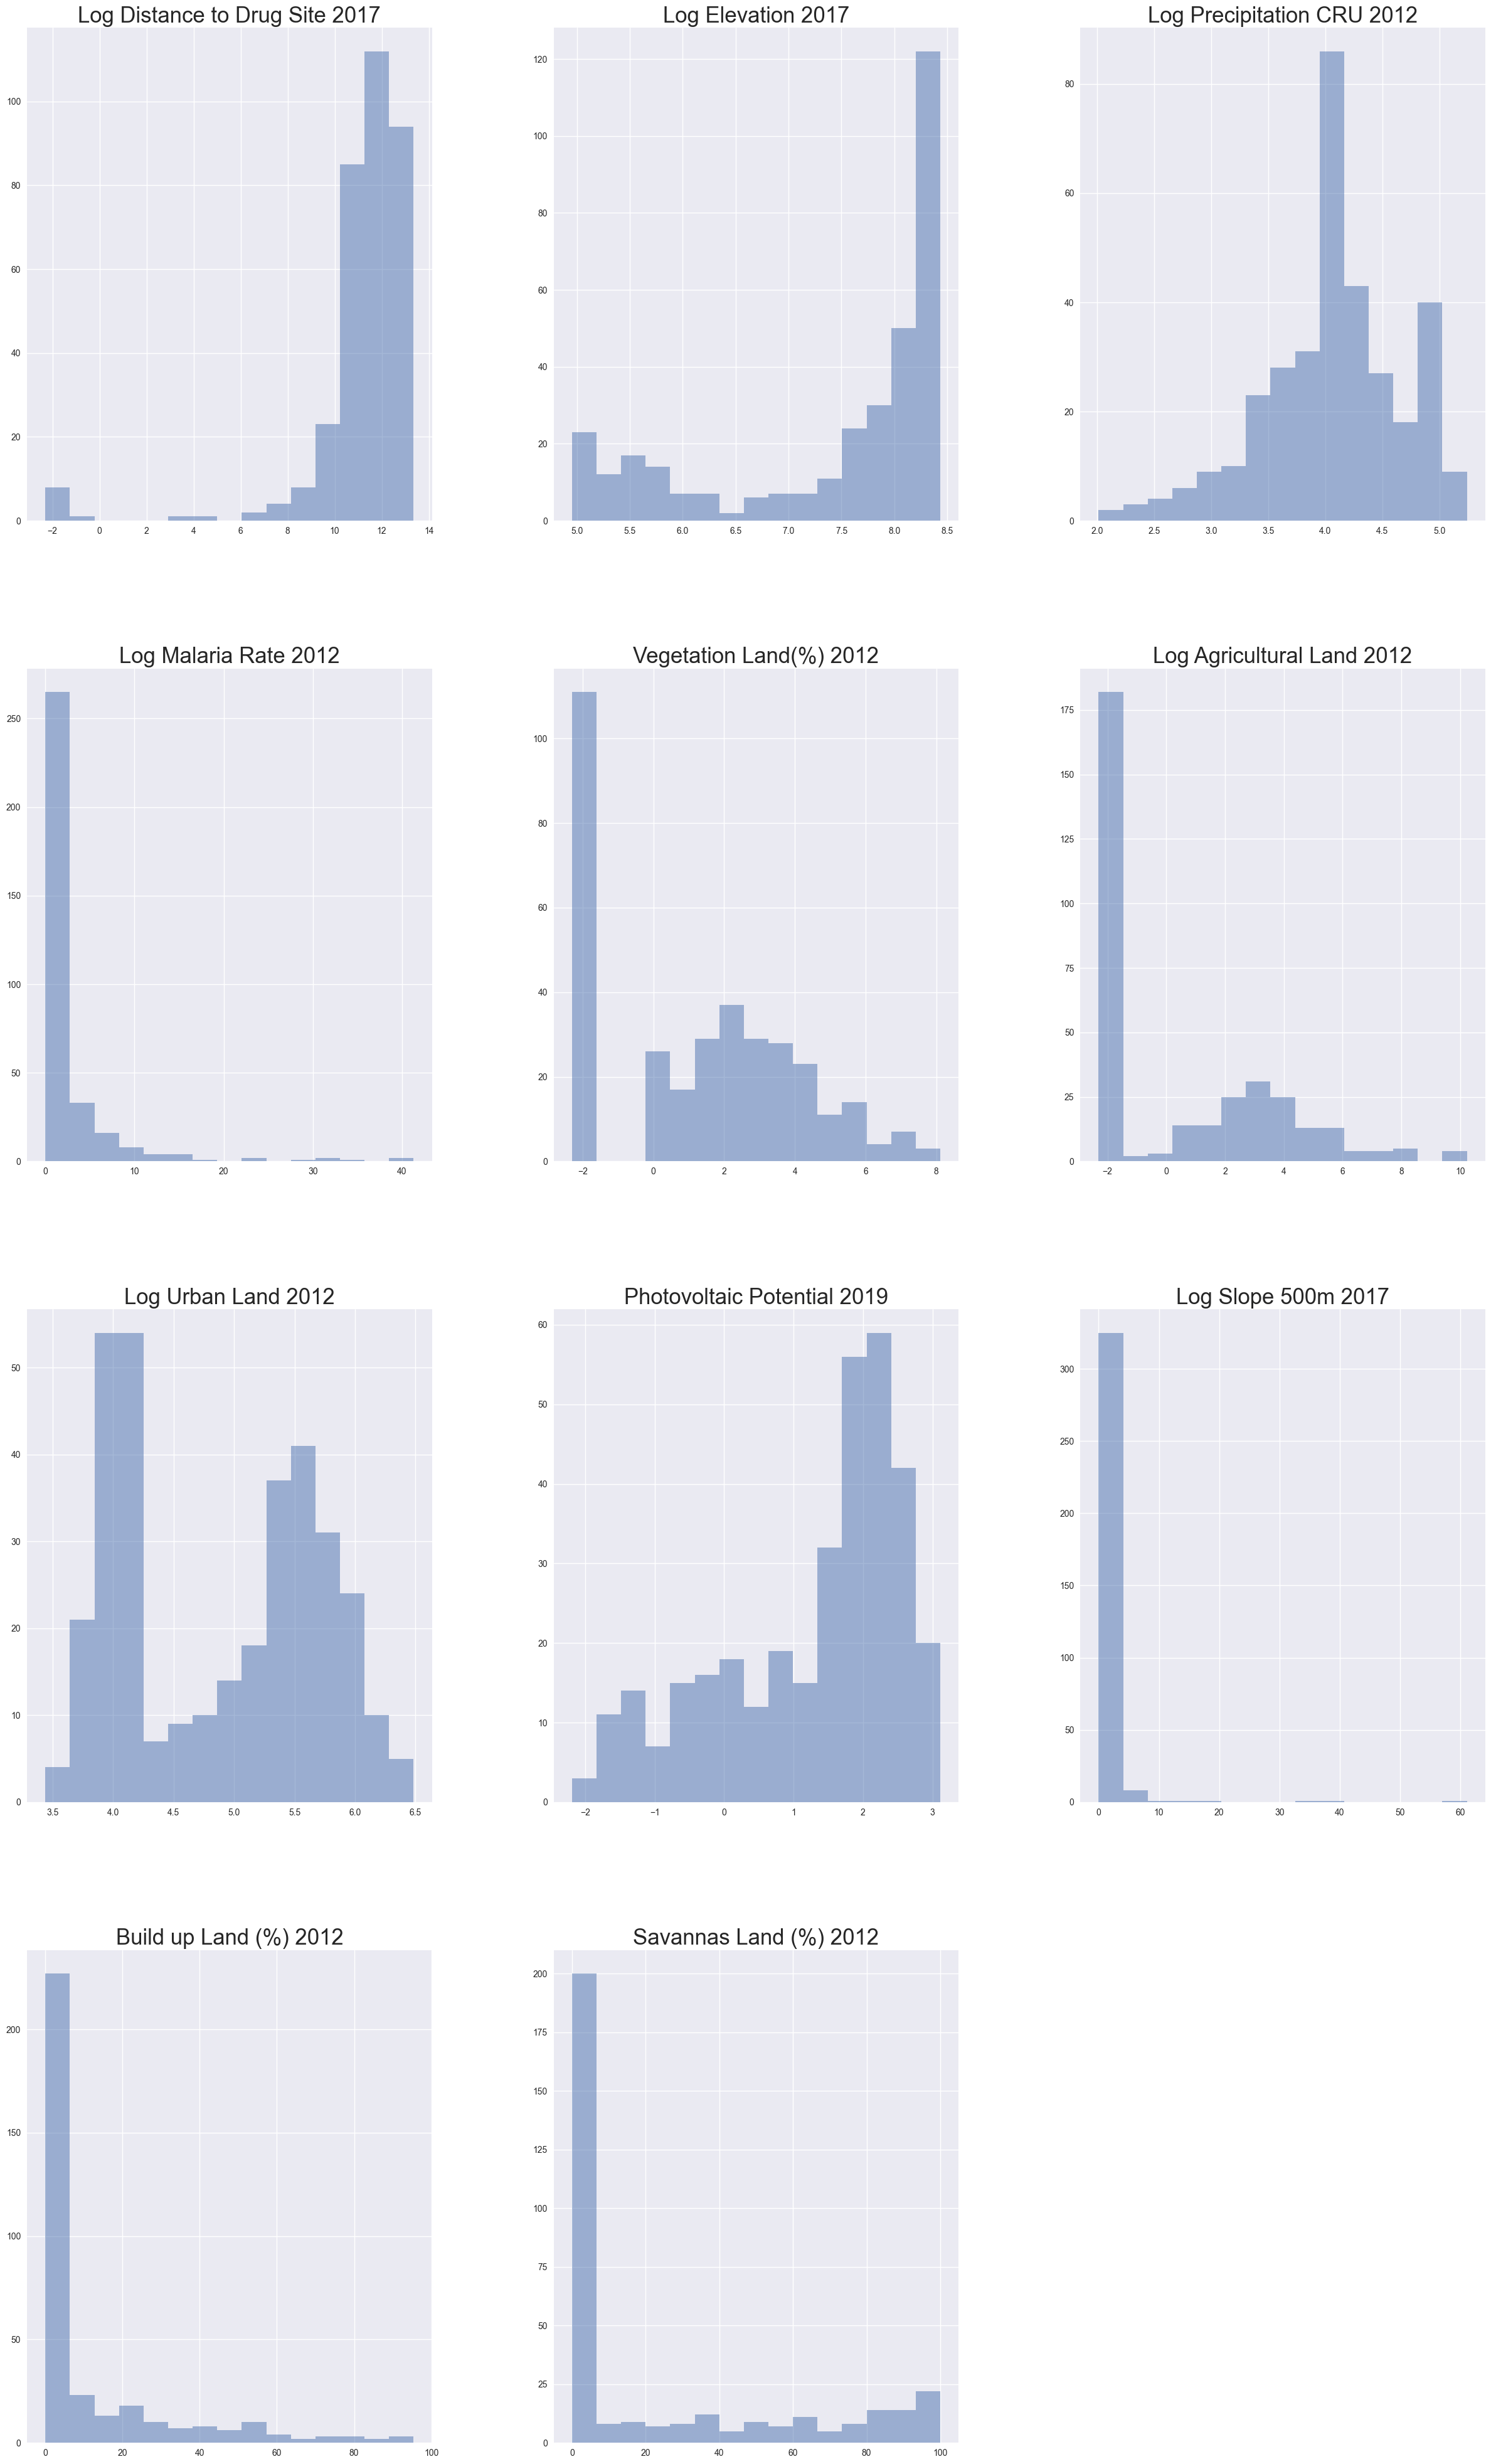

In [ ]:
used = ['ln_dist_drug2017mean', 'ln_elev2017mean','ln_precCRU2012mean',
         'land_per_area_2012_cropland_natural_vegetation_mosaic', 'lnagr_land2012', 'lnurb_land2012', 'photov2019mean', 
         "ln_slope500m2017mean", 'land_per_area_2012_urban_and_builtup',
         'land_per_area_2012_full_savannas_grasslands', "land_per_area_2012_full_forest"]

plt.rcParams.update({'font.size': 25})
#sat_mod.drop(columns= {"id", 'land_per_area_2012_count'}).hist(bins=15, figsize=(30,50), alpha=0.5)
axes = sat_mod[used].hist(bins=15, figsize=(30,50), alpha=0.5)

titles = ["Log Distance to Drug Site 2017", "Log Elevation 2017", "Log Precipitation CRU 2012", "Log Malaria Rate 2012", 
          "Vegetation Land(%) 2012", "Log Agricultural Land 2012", "Log Urban Land 2012", "Photovoltaic Potential 2019", 
          "Log Slope 500m 2017", "Build up Land (%) 2012", "Savannas Land (%) 2012", "Forest Land (%) 2012"]

for ax, title in zip(axes.flatten(), titles):
    ax.set_title(title, fontsize=25)
plt.show()





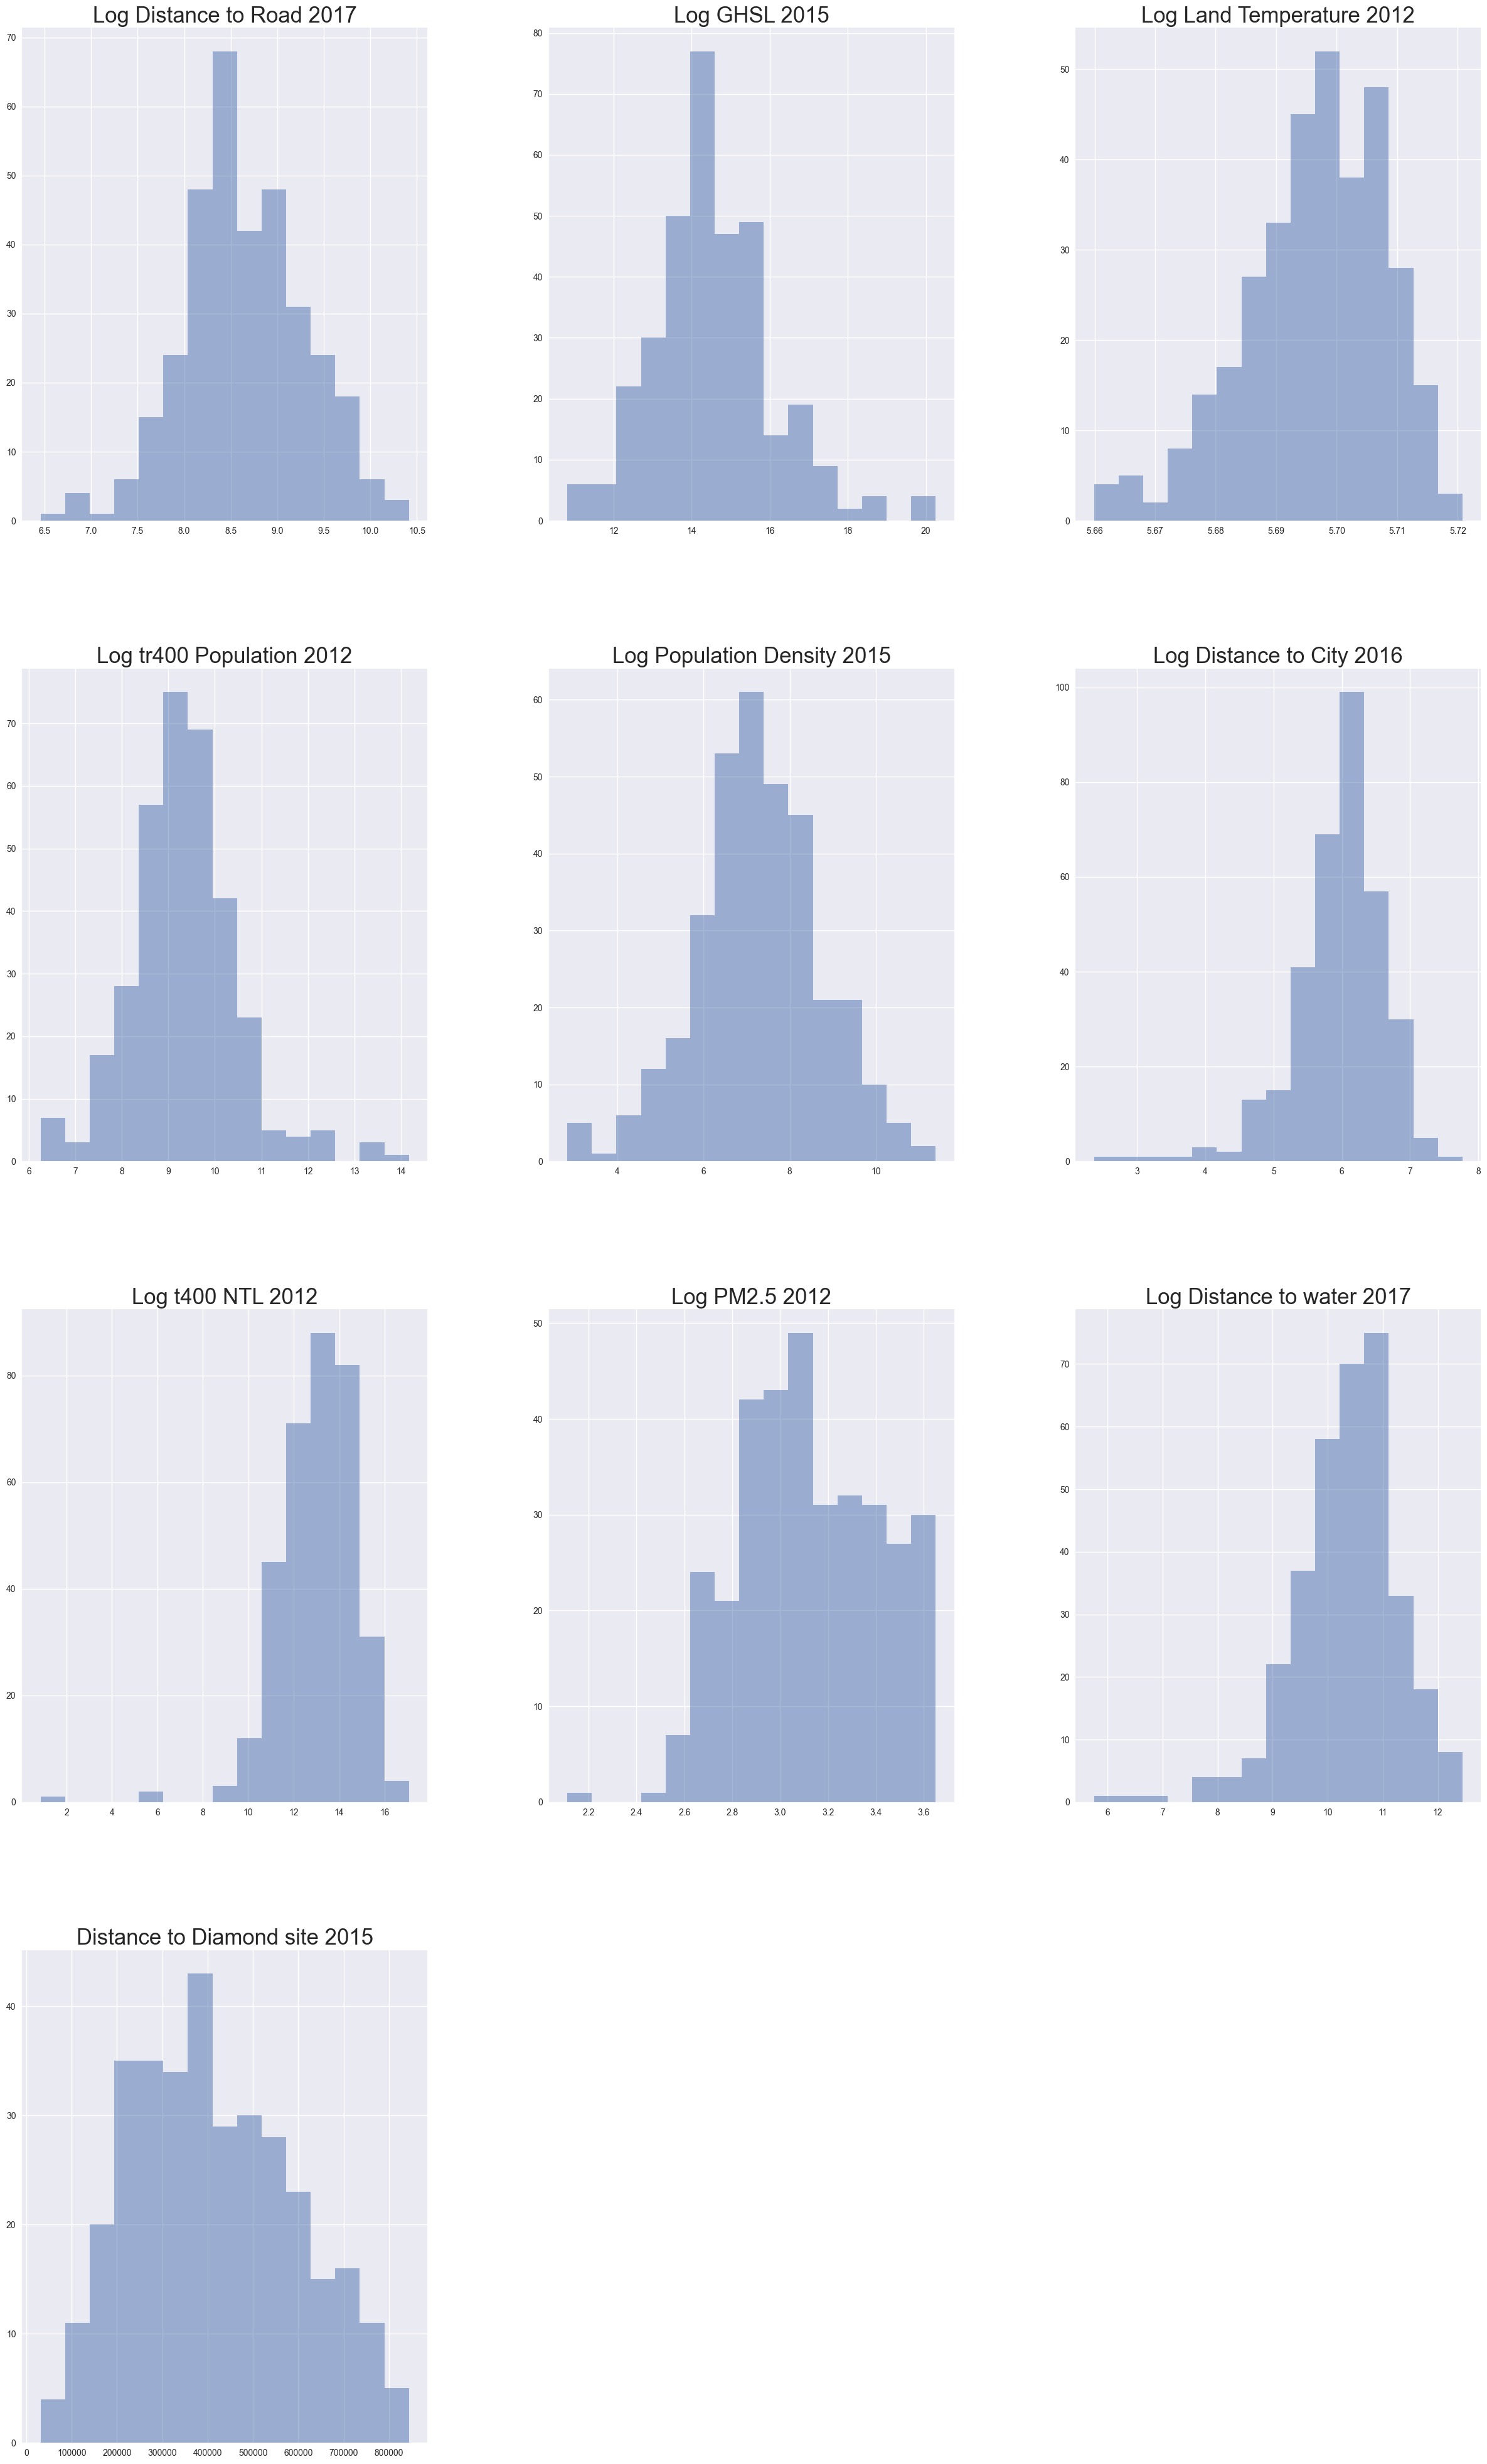

In [ ]:
normal = ['ln_dist_road2017', 'ln_ghsl2015', 'ln_land_temp2012', 'ln_tr400_pop2012', 'ln_density_pop2015count',
          'ln_access2016mean', 'ln_t400NTLpc2012', 'ln_pm25_2012', 'ln_dist_water2017mean', 'dist_diamond2015',]
#sat_mod.drop(columns= {"id", 'land_per_area_2012_count'}).hist(bins=15, figsize=(30,50), alpha=0.5)
plt.rcParams.update({'font.size': 25})

axes = sat_mod[normal].hist(bins=15, figsize=(30,50), alpha=0.5)

titles = ["Log Distance to Road 2017", "Log GHSL 2015", "Log Land Temperature 2012", "Log tr400 Population 2012",
          "Log Population Density 2015", "Log Distance to City 2016", "Log t400 NTL 2012", "Log PM2.5 2012",
          "Log Distance to water 2017", "Distance to Diamond site 2015"]

for ax, title in zip(axes.flatten(), titles):
    ax.set_title(title, fontsize = 25)
plt.show()

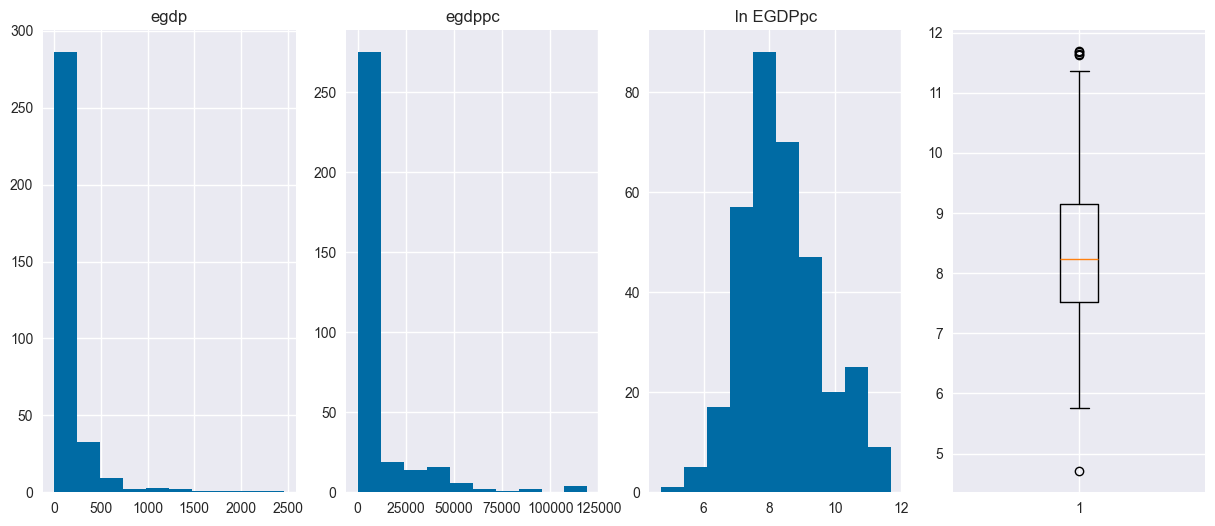

In [ ]:
plt.style.use("tableau-colorblind10")

fig, (ax0, ax1, ax2, ax4) = plt.subplots(nrows=1,
                                 ncols=4,
                                 figsize=(15,6),
                                 alpha=0.5)
ax0.hist(sat["egdp2012"])
ax0.set(title="egdp")

ax1.hist(satellite_full["EGDPpc2012"])
ax1.set(title= "egdppc")

ax2.hist(sat_mod["lnEGDPpc2012"])
ax2.set(title="ln EGDPpc")

ax4.boxplot(sat_mod["lnEGDPpc2012"]);


In [ ]:
#plt.style.available

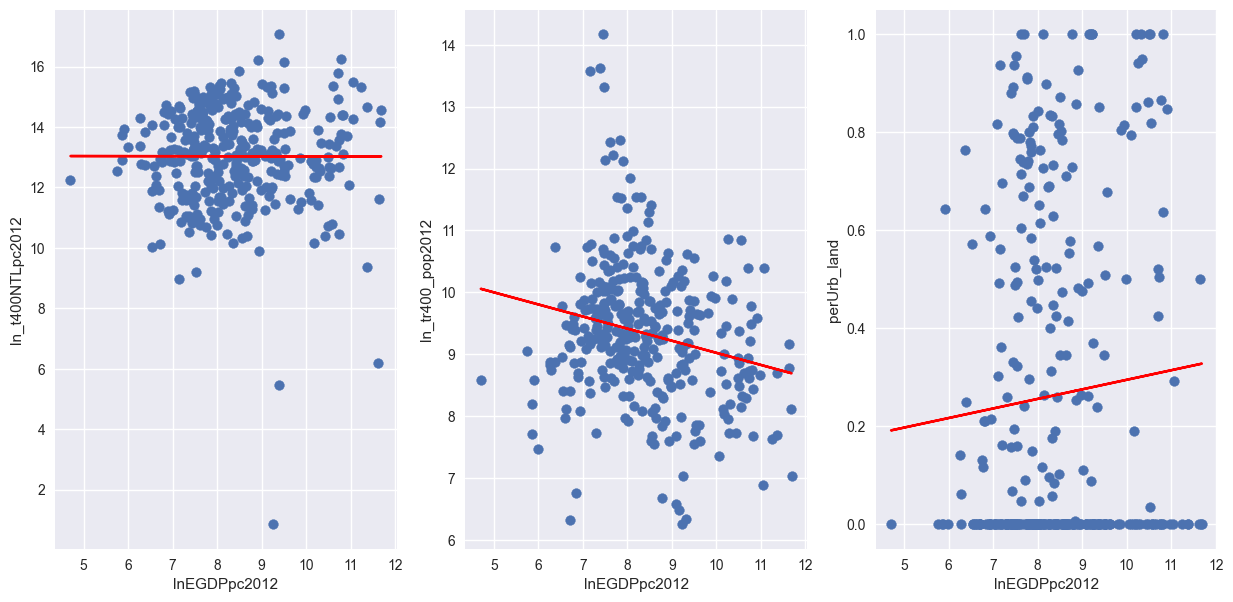

In [ ]:
plt.style.use("seaborn-v0_8")

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(15,7))
#----- ax0
ax0.scatter(x=sat_mod['lnEGDPpc2012'], y=sat_mod["ln_t400NTLpc2012"])
ax0.set(xlabel="lnEGDPpc2012", ylabel="ln_t400NTLpc2012")

# add trendline
z = np.polyfit(sat_mod["lnEGDPpc2012"], sat_mod['ln_t400NTLpc2012'], 1)
p = np.poly1d(z)
ax0.plot(sat_mod["lnEGDPpc2012"],p(sat_mod["lnEGDPpc2012"]),"r-")

#----- ax1
ax1.scatter(x=sat_mod["lnEGDPpc2012"], y=sat_mod['ln_tr400_pop2012'])
ax1.set(xlabel="lnEGDPpc2012", ylabel="ln_tr400_pop2012")

# add trendline
z = np.polyfit(sat_mod["lnEGDPpc2012"], sat_mod['ln_tr400_pop2012'], 1)
p = np.poly1d(z)
ax1.plot(sat_mod["lnEGDPpc2012"],p(sat_mod["lnEGDPpc2012"]),"r-")

#----- ax2
ax2.scatter(x=sat_mod["lnEGDPpc2012"], y=sat_mod['perUrb_land2012'])
ax2.set(xlabel="lnEGDPpc2012", ylabel="perUrb_land")

# add trendline
z = np.polyfit(sat_mod["lnEGDPpc2012"], sat_mod['perUrb_land2012'], 1)
p = np.poly1d(z)
ax2.plot(sat_mod["lnEGDPpc2012"],p(sat_mod["lnEGDPpc2012"]),"r-")



In [ ]:
egdp_ntl = sat_mod["lnEGDPpc2012"].corr(sat_mod['ln_t400NTLpc2012'])
egdp_pop = sat_mod["lnEGDPpc2012"].corr(sat_mod['ln_tr400_pop2012'])
egdp_urb = sat_mod["lnEGDPpc2012"].corr(sat_mod['perUrb_land2012'])

print(f"Correlation of egdp and ntl: {egdp_ntl}")
print(f"Correlation of egdp and pop: {egdp_pop}")
print(f"Correlation of egdp and Urban land %: {egdp_urb}")

Correlation of egdp and ntl: -0.0013160348349785576
Correlation of egdp and pop: -0.21141855279870278
Correlation of egdp and Urban land %: 0.06981947820446131


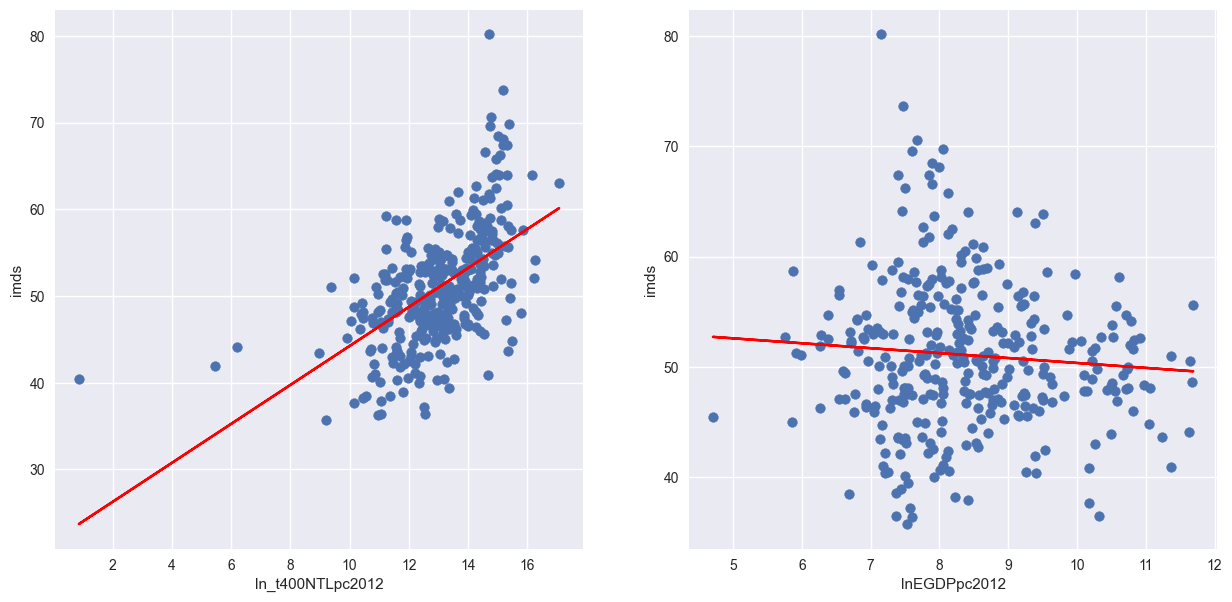

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,7))

#----- ax1
ax1.scatter(x=sat_mod["ln_t400NTLpc2012"], y=sdg_indexes['imds'])
ax1.set(xlabel="ln_t400NTLpc2012", ylabel="imds")

# add trendline
z = np.polyfit(sat_mod["ln_t400NTLpc2012"], sdg_indexes['imds'], 1)
p = np.poly1d(z)
ax1.plot(sat_mod["ln_t400NTLpc2012"],p(sat_mod["ln_t400NTLpc2012"]), "r-")

#----- ax2
ax2.scatter(x=sat_mod["lnEGDPpc2012"], y=sdg_indexes['imds'])
ax2.set(xlabel="lnEGDPpc2012", ylabel="imds");

# add trendline
z = np.polyfit(sat_mod["lnEGDPpc2012"], sdg_indexes['imds'], 1)
p = np.poly1d(z)
ax2.plot(sat_mod["lnEGDPpc2012"], p(sat_mod["lnEGDPpc2012"]), "r-")

In [ ]:
ntl_imds = sat_mod["ln_t400NTLpc2012"].corr(sdg_indexes['imds'])
egdp_imds = sat_mod["lnEGDPpc2012"].corr(sdg_indexes['imds'])

print(f"Correlation of ntl and imds: {ntl_imds}")
print(f"Correlation of egdp and imds: {egdp_imds}")

Correlation of ntl and imds: 0.5548280194761073
Correlation of egdp and imds: -0.08182429944254284


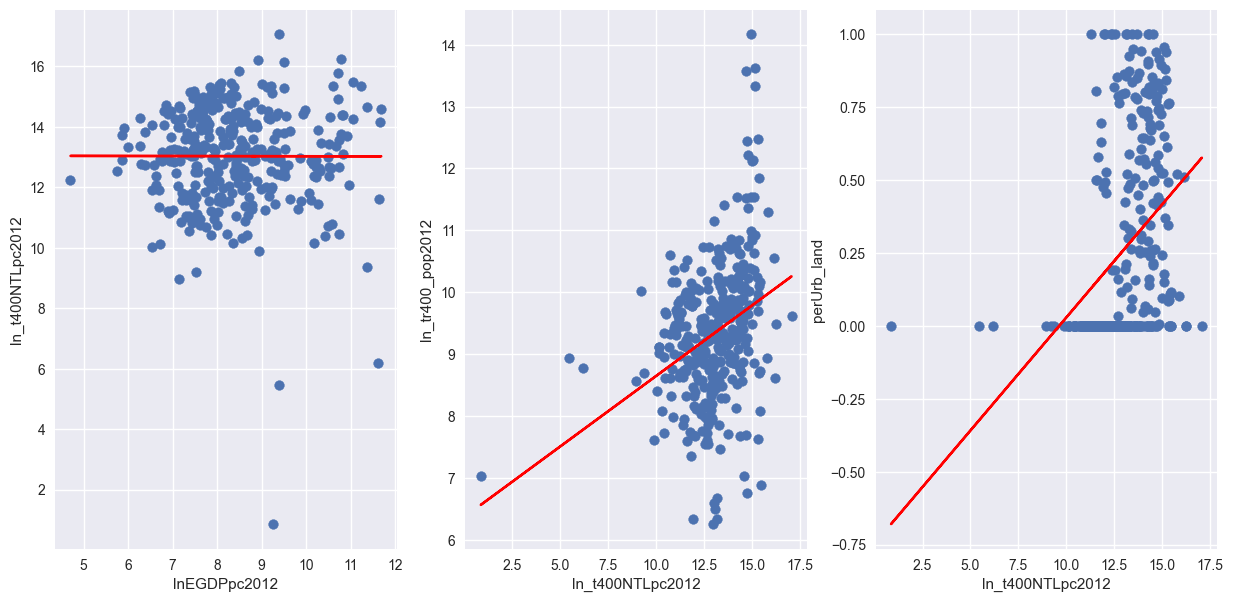

In [ ]:
plt.style.use("seaborn-v0_8")

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(15,7))
#----- ax0
ax0.scatter(x=sat_mod['lnEGDPpc2012'], y=sat_mod["ln_t400NTLpc2012"])
ax0.set(xlabel="lnEGDPpc2012", ylabel="ln_t400NTLpc2012")

# add trendline
z = np.polyfit(sat_mod["lnEGDPpc2012"], sat_mod['ln_t400NTLpc2012'], 1)
p = np.poly1d(z)
ax0.plot(sat_mod["lnEGDPpc2012"],p(sat_mod["lnEGDPpc2012"]),"r-")

#----- ax1
ax1.scatter(x=sat_mod["ln_t400NTLpc2012"], y=sat_mod['ln_tr400_pop2012'])
ax1.set(xlabel="ln_t400NTLpc2012", ylabel="ln_tr400_pop2012")

# add trendline
z = np.polyfit(sat_mod["ln_t400NTLpc2012"], sat_mod['ln_tr400_pop2012'], 1)
p = np.poly1d(z)
ax1.plot(sat_mod["ln_t400NTLpc2012"],p(sat_mod["ln_t400NTLpc2012"]),"r-")

#----- ax2
ax2.scatter(x=sat_mod["ln_t400NTLpc2012"], y=sat_mod['perUrb_land2012'])
ax2.set(xlabel="ln_t400NTLpc2012", ylabel="perUrb_land")

# add trendline
z = np.polyfit(sat_mod["ln_t400NTLpc2012"], sat_mod['perUrb_land2012'], 1)
p = np.poly1d(z)
ax2.plot(sat_mod["ln_t400NTLpc2012"],p(sat_mod["ln_t400NTLpc2012"]),"r-");



In [ ]:
egdp_ntl = sat_mod["lnEGDPpc2012"].corr(sat_mod['ln_t400NTLpc2012'])
egdp_pop = sat_mod["ln_t400NTLpc2012"].corr(sat_mod['ln_tr400_pop2012'])
egdp_urb = sat_mod["ln_t400NTLpc2012"].corr(sat_mod['perUrb_land2012'])

print(f"Correlation of egdp and ntl: {egdp_ntl}")
print(f"Correlation of egdp and pop: {egdp_pop}")
print(f"Correlation of egdp and Urban land %: {egdp_urb}")

Correlation of egdp and ntl: -0.0013160348349785576
Correlation of egdp and pop: 0.3324972344406324
Correlation of egdp and Urban land %: 0.3744009993102872
